In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'+'xsec_wo_dirt/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.18/04


In [2]:
#!jupyter nbconvert --to script numuCCana_xsec_weighted.ipynb

In [3]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Cross section for single differnetial in Momentum (no sys)

In [4]:
# Load input files
#inputdir = '/home/thomasm/numuCC/V33/10kevents/'
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"xsec_momentum_wighted.root","RECREATE");

#filename_overlay = 'NuCCana_Overlay_V18_V4.root'
#filename_overlay = 'NuCCana_overlay_V26_weight.root'
filename_overlay = 'NuCCana_overlay_V26_mar18.root'
filename_data = 'NuCCana_data_V25.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
tree_name = 'numuCCAna'

In [5]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =    7.644e+18  # best with tor875
data_trigger = 1838700.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	1012051
Data: Number of Entries:	28005
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		7.644e+18
Ext:		0
Overlay:	1.26811760704e+21
Dirt:		1.25019694173e+20

Scalefactors: 
Data:		1.0
Ext:		0.0967862715198
Overlay:	0.0060278320856
Dirt:		0.0611423668132


In [6]:
if 1:
    filename_overlay = filename_overlay+'out4_noflux.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

Overlay: Number of Entries:	1013969
Data: Number of Entries:	28004
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40800



In [7]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 5.64049e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [8]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')

energy_cut = ' && MCle_Energy>0.15'

numu_signal = numu_signal+energy_cut
numu_true = numu_true+energy_cut
numu_nomu = numu_nomu+energy_cut
numu_lowpur = numu_lowpur+energy_cut
numu_nc = numu_nc+energy_cut
numu_ov = numu_ov+energy_cut
numu_other = numu_other+energy_cut
       
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [9]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [10]:
# Load the global variables for access of functions
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root,outputdir_pdf)
#NuCC.printGlobal()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [11]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

In [12]:
'''track_start_border_x = '(TrackStart_x_sce <(-1.55+1) || TrackStart_x_sce > (254.8-1))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+1) || TrackStart_y_sce > (117.47-1))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1))'
track_start_border_z = '(TrackStart_z_sce <(0.1+1) || TrackStart_z_sce > (1036.9-1))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1))'
'''
track_start_border_x = '(TrackStart_x_sce <(-1.55+5) || TrackStart_x_sce > (254.8-5))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+5) || TrackEnd_x_sce > (254.8-5))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+5) || TrackStart_y_sce > (117.47-5))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+5) || TrackEnd_y_sce > (117.47-5))'
track_start_border_z = '(TrackStart_z_sce <(0.1+5) || TrackStart_z_sce > (1036.9-5))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+5) || TrackEnd_z_sce > (1039.9-5))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-4)<0.9 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-4)<0.9 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.95)<0.9 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-3.95)<0.9 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

#weight_name = 'EventWeight'
weight_name = 'EventWeight*TunedCentralValue_Genie'



In [13]:
# calculate total flux integrated cross section:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
N_data = data_out.GetEntries(cut)
N_ext  = ext_out.GetEntries(cut)*scale_out[ext_out]
N_dirt = dirt_out.GetEntries(cut)*scale_out[dirt_out]
N_overlay = overlay_out.GetEntries(cut+'&& !numu_signal')*scale_out[overlay_out]
N_signal = overlay_out.GetEntries(cut+'&& numu_signal')*scale_out[overlay_out]
N_true = overlay_out.GetEntries('numu_true')*scale_out[overlay_out]

print N_overlay

h_weight_func = ROOT.TH1F("h_weight_func",'h_weight_func',10000,0,1000)
globale.dirt_out.Draw(weight_name+'>>h_weight_func',cut+' && 1','0')
dirt_pass_weight = h_weight_func.GetMean() 
globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && numu_signal','0') # weights for signal definition
overlay_signal = h_weight_func.GetMean()
globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && !numu_signal','0') # weights for signal definition
overlay_pass_weight = h_weight_func.GetMean()

overlay_out.Draw(weight_name+'>>h_weight_func',numu_true,'0') # weights for signal definition
overlay_true_weight = h_weight_func.GetMean()

print overlay_pass_weight

N_dirt = N_dirt*dirt_pass_weight
N_overlay = N_overlay*overlay_pass_weight
N_signal = N_signal*overlay_signal
N_true = N_true*overlay_true_weight
eff = N_signal/N_true

sigma_tot = (N_data- (N_ext+N_dirt+N_overlay))/(eff*beam_flux*N_tot)
print 'Number of data:', N_data
print 'Number of ext:', N_ext
print 'Number of dirt:', N_dirt
print 'Number of overlay:', N_overlay
print 'Number of overlay signal:', N_signal
print 'Efficiency: ',eff
print 'Total integrated cross section:', sigma_tot

sigma_tot_MC = (N_signal)/(eff*beam_flux*N_tot)
print 'Total integrated cross section for MC:', sigma_tot_MC

179.394310699
1.11387751556
Number of data: 1348
Number of ext: 142.179032863
Number of dirt: 32.1298248268
Number of overlay: 199.823289107
Number of overlay signal: 972.631089505
Efficiency:  0.556227829903
Total integrated cross section: 7.56477380821e-39
Total integrated cross section for MC: 7.55516692203e-39


In [14]:
# calculate total flux integrated cross section without dirt:

sigma_tot_wodrit = (N_data- (N_ext+N_overlay))/(eff*beam_flux*N_tot)
print 'Total integrated cross section:', sigma_tot_wodrit

sigma_tot_MC_wodirt = (N_signal)/(eff*beam_flux*N_tot)
print 'Total integrated cross section for MC:', sigma_tot_MC_wodirt

print 'Difference: ',(sigma_tot_wodrit - sigma_tot)*100.0/sigma_tot


Total integrated cross section: 7.81435064404e-39
Total integrated cross section for MC: 7.55516692203e-39
Difference:  3.29919759864


In [15]:
from array import array
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1
h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))

In [16]:
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/25.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/20.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [17]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


792

Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_eff_trueMom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_eff_trueMom.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_eff_trueMom.pdf has been created


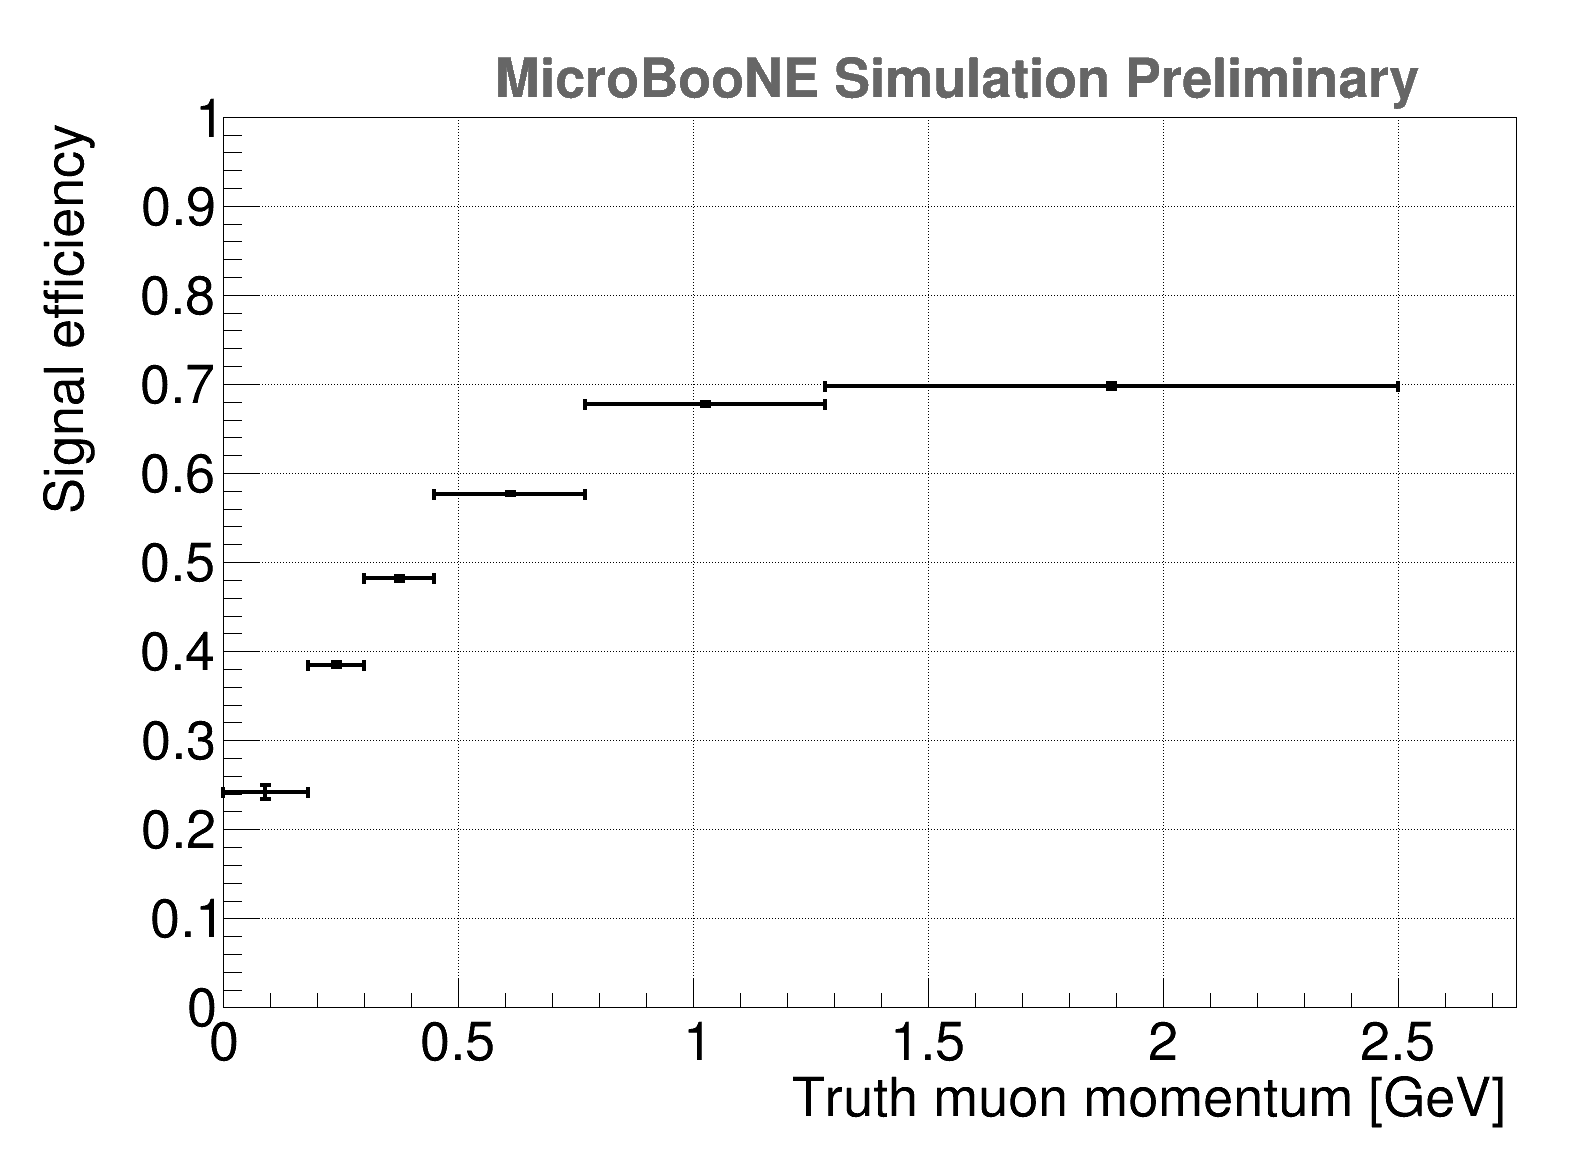

In [18]:
xstart = 0
xend = 2
xbin = 100
#weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum momentum efficiency'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
#h_init_eff_energy = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy,zahler_cut)
#h_init_eff_energy_1 = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy_1,nenner_cut)
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("Truth muon momentum [GeV]")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.GetYaxis().SetTitleSize(0.05)
graph.GetYaxis().SetTitleOffset(0.0)
graph.GetYaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleSize(0.05)
graph.GetXaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleOffset(1)
graph.SetLineColor(ROOT.kBlack)
graph.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
graph.Draw("AP")
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_trueMom.png")
c1.SaveAs(globale.outputdir_root + "h_eff_trueMom.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_trueMom.pdf")

eff.Write("h_eff_true")

1818

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_eff_trueMom_fine.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_eff_trueMom_fine.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/w

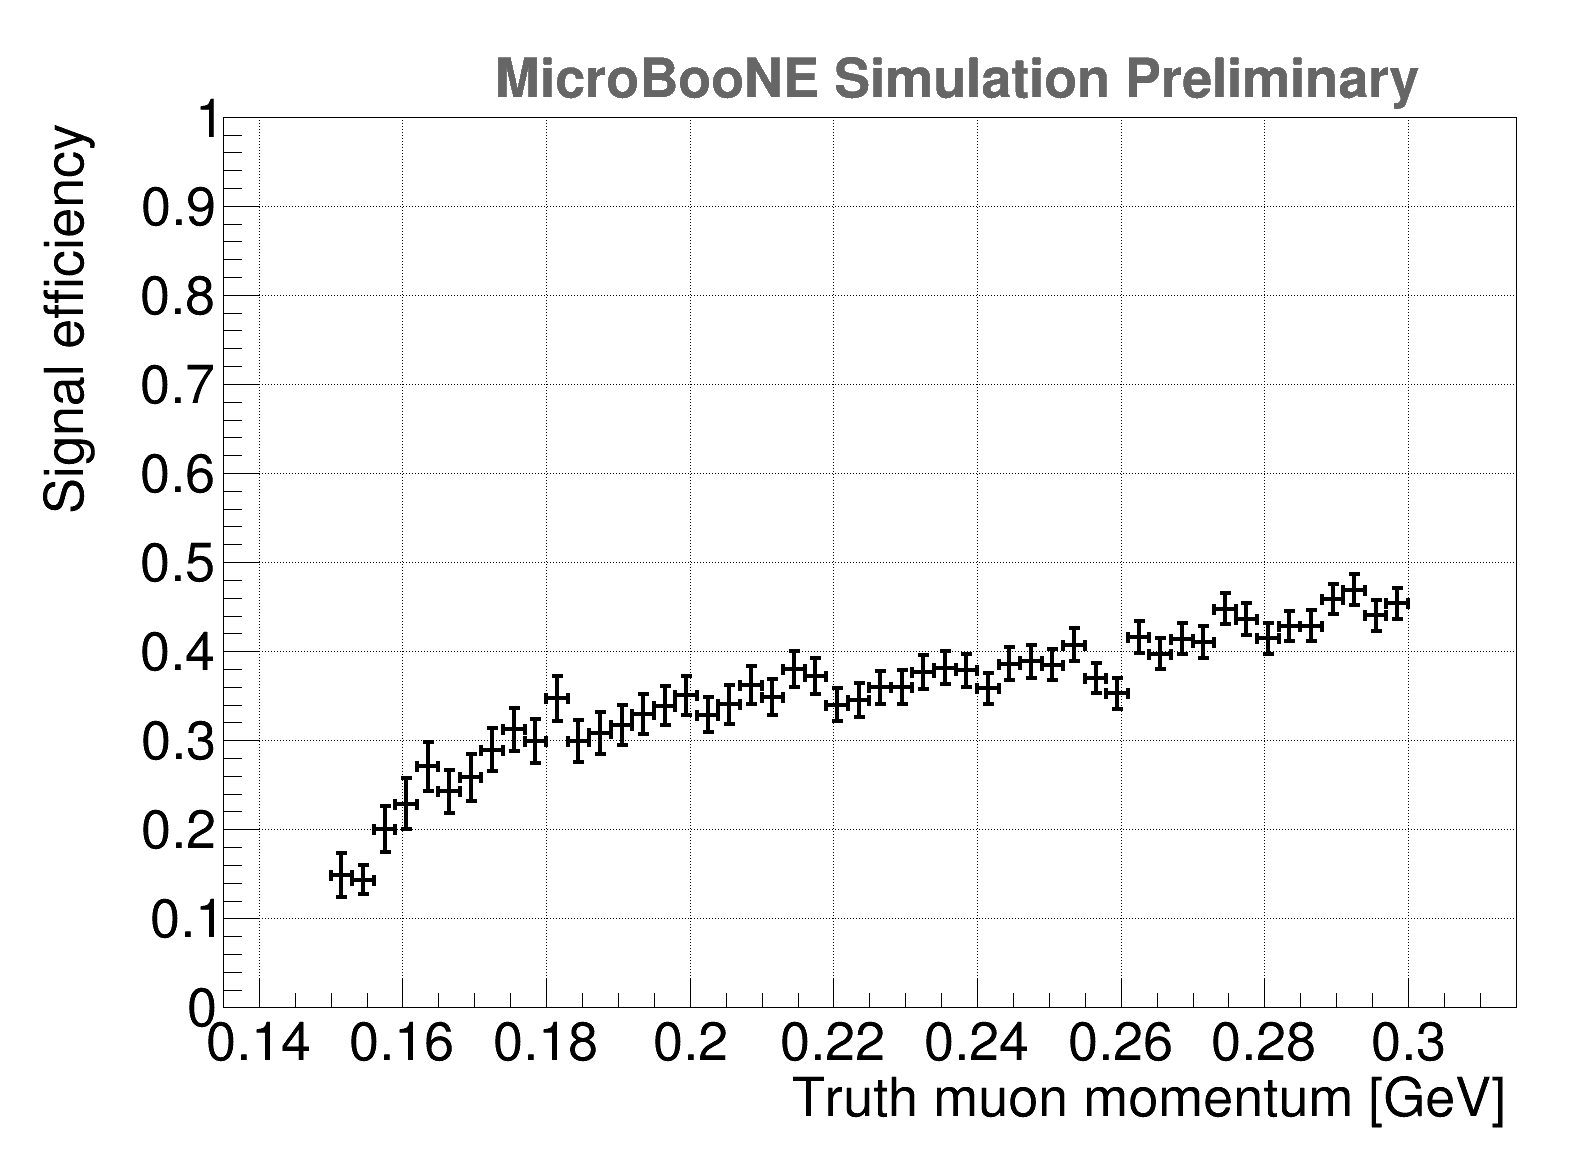

In [19]:
xstart = 0
xend = 2
xbin = 100
#weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum momentum efficiency'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,100,0,0.3)
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,100,0,0.3)
#h_init_eff_energy = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy,zahler_cut)
#h_init_eff_energy_1 = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy_1,nenner_cut)
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("Truth muon momentum [GeV]")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.GetYaxis().SetTitleSize(0.05)
graph.GetYaxis().SetTitleOffset(0.0)
graph.GetYaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleSize(0.05)
graph.GetXaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleOffset(1)
graph.SetLineColor(ROOT.kBlack)
graph.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
graph.Draw("AP")
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_trueMom_fine.png")
c1.SaveAs(globale.outputdir_root + "h_eff_trueMom_fine.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_trueMom_fine.pdf")

eff.Write("h_eff_true")

In [20]:
N_sig = h_init_eff_energy.Integral(0,binnum+1)
N_true = h_init_eff_energy_1.Integral(0,binnum+1)
#print N_sig/N_true,N_sig,N_true

fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1


175562

Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h2_true_MCS.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h2_true_MCS.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h2_true_MCS.pdf has been created


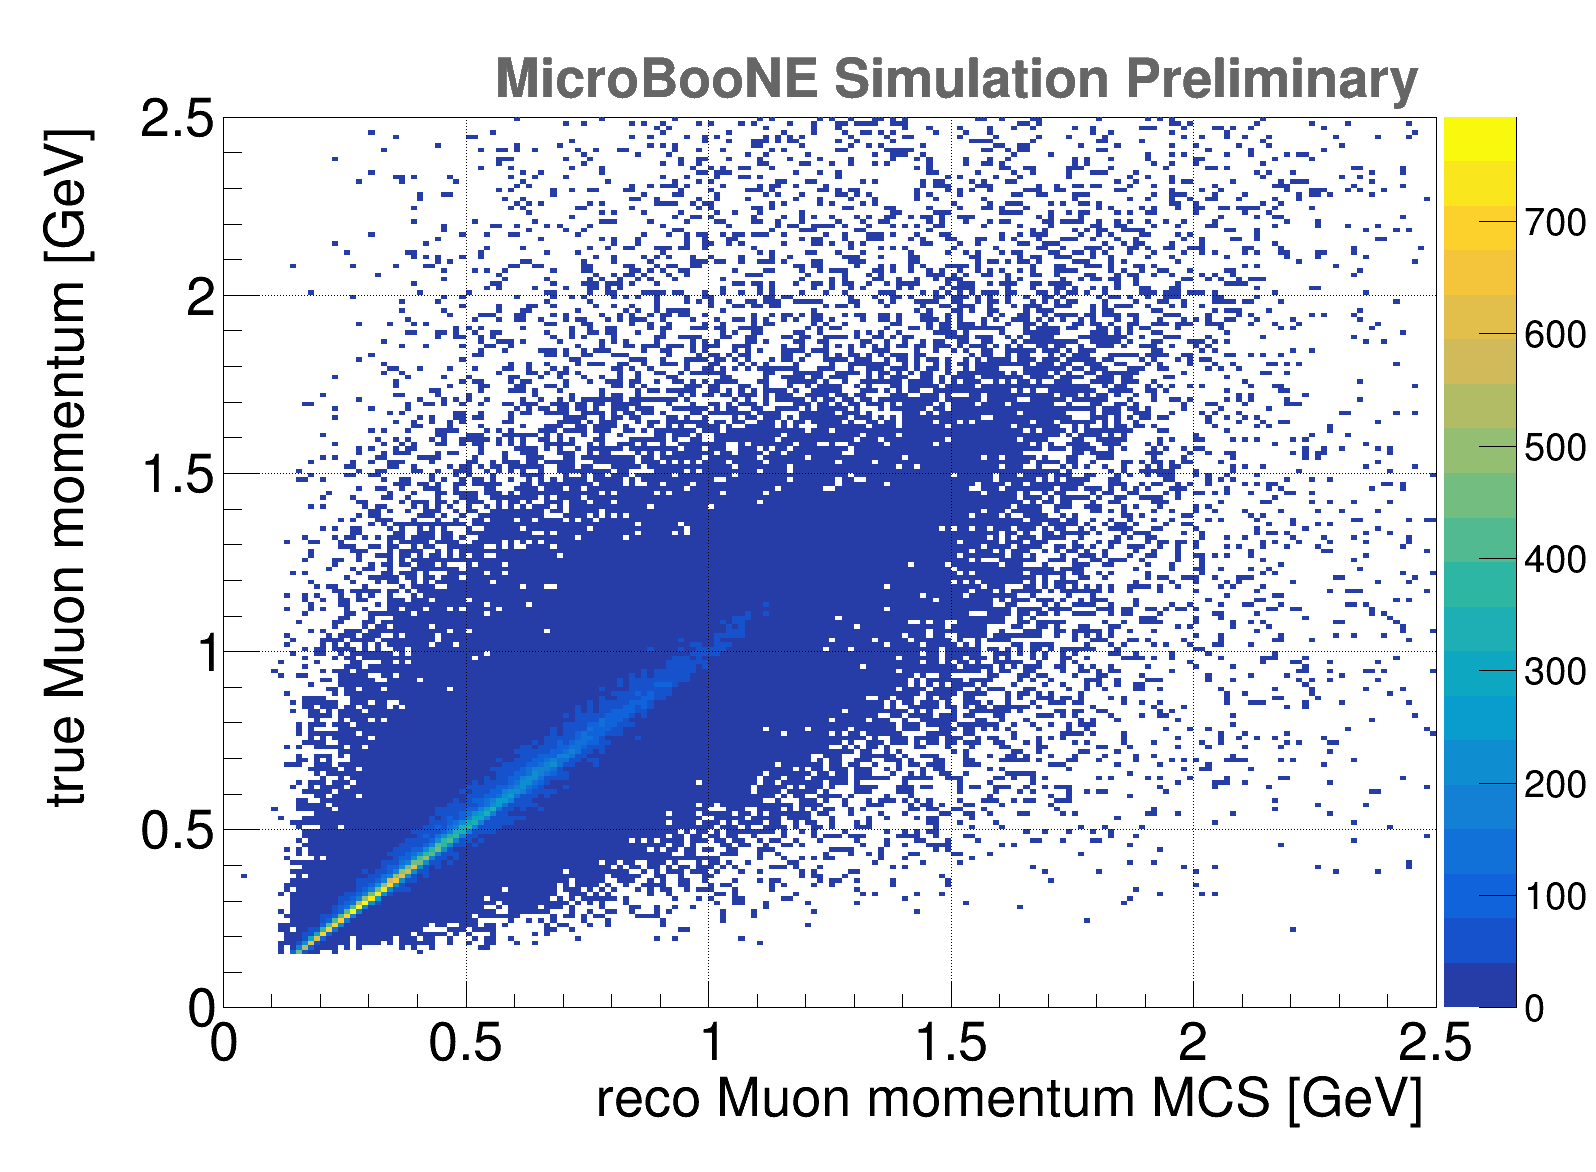

In [21]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,0,2.5,200,0,2.5)
h_migration_r = ROOT.TH2F("h_migration_r",'Truth vs. Reco',200,0,2.5,200,0,2.5)
print cut
globale.overlay_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&& numu_signal && track_end_uncontained)','')
globale.overlay_out.Draw('MCle_Energy:TrackMomRange_mu'+'>>h_migration_r',weight_name+'*('+cut+'&& numu_signal && !track_end_uncontained)','')
h_migration.Add(h_migration_r)
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
h_migration.Draw("colz")
prelim = draw_sim()
prelim.Draw()
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_MCS.root")
c1.SaveAs(globale.outputdir_png + "h2_true_MCS.png")
c1.SaveAs(globale.outputdir_pdf + "h2_true_MCS.pdf")
h_migration.Write("h2_true_MCS_fine")

1161

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_migration_r (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h2_true_MCS_bin.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h2_true_MCS_bin.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h2_true_MCS_bin.pdf has been created


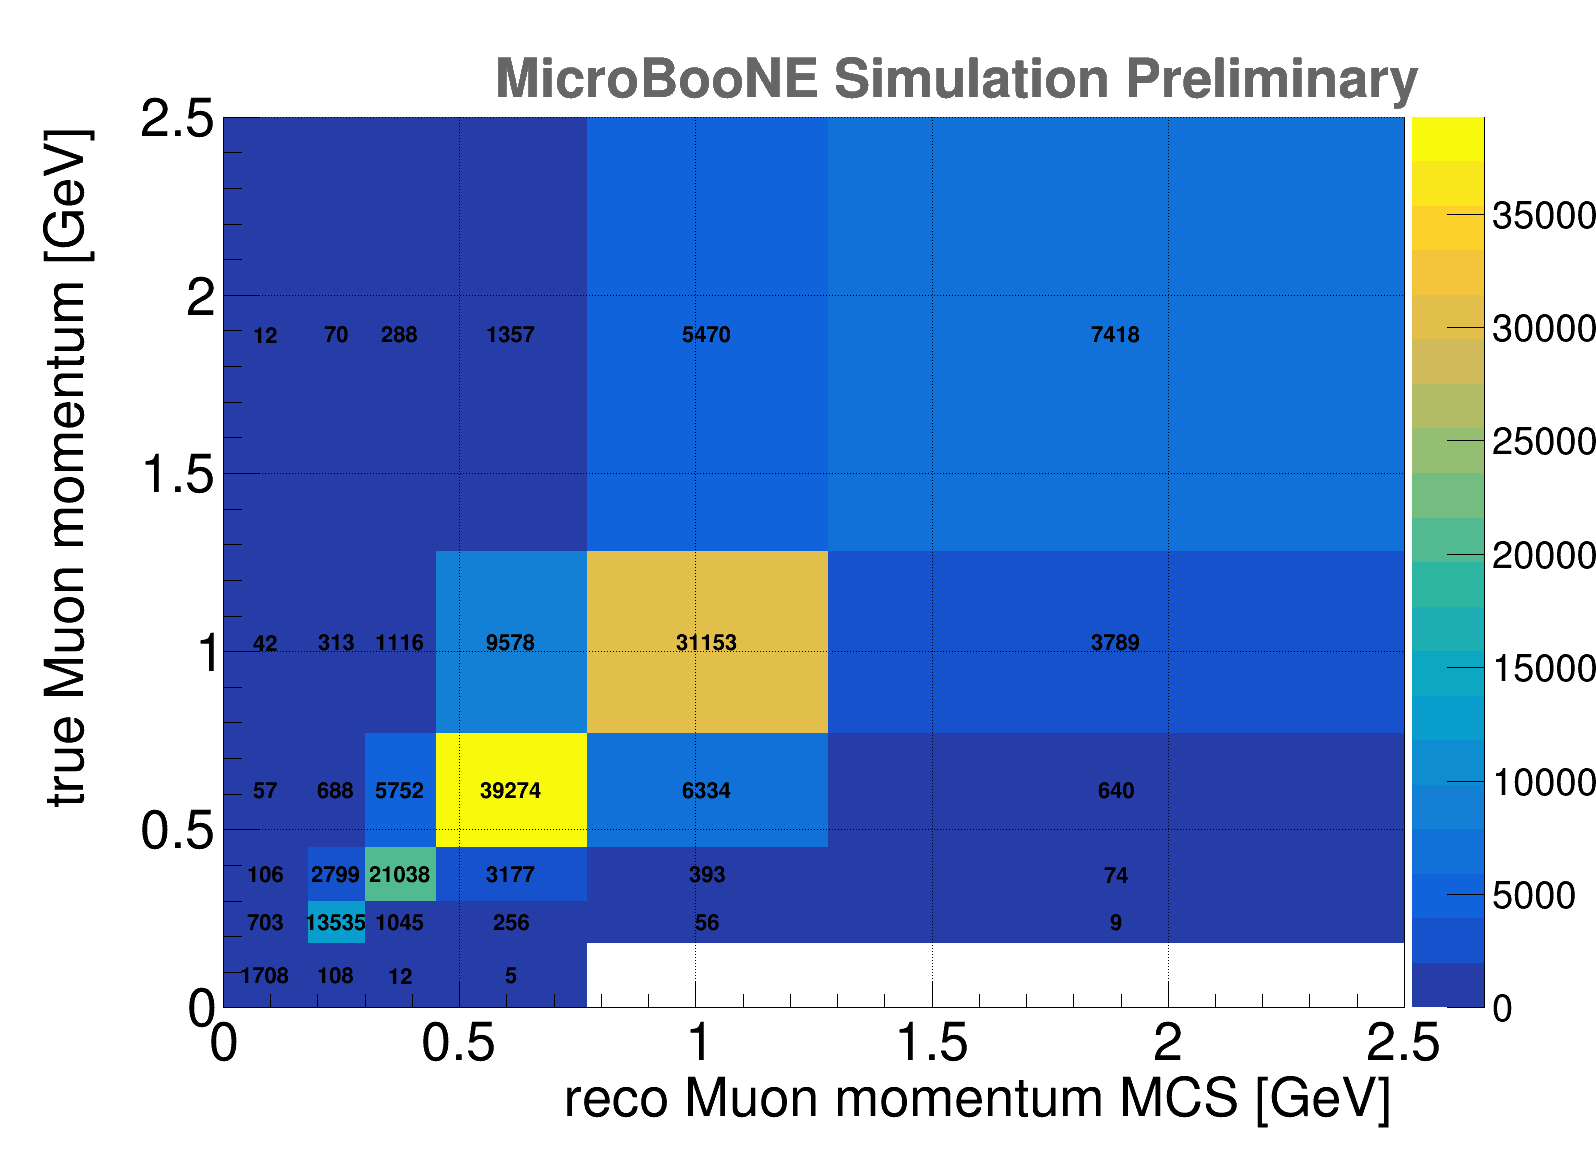

In [22]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
h_migration_r = ROOT.TH2F("h_migration_r",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
globale.overlay_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&& numu_signal && track_end_uncontained)','')
globale.overlay_out.Draw('MCle_Energy:TrackMomRange_mu'+'>>h_migration_r',weight_name+'*('+cut+'&& numu_signal && !track_end_uncontained)','')
#globale.overlay_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*(numu_signal)','')
h_migration.Add(h_migration_r)
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.Draw("colz")
h_migration.Draw("same text")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.0f')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_MCS_bin.root")
c1.SaveAs(globale.outputdir_png + "h2_true_MCS_bin.png")
c1.SaveAs(globale.outputdir_pdf + "h2_true_MCS_bin.pdf")
h_migration.Write("h2_true_MCS_bin")

[[0.00000000e+00 0.00000000e+00 6.40821792e-05 8.95100001e-05
  0.00000000e+00 5.10284273e-05 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.31309321e-01 4.50202654e-02 3.84185697e-03
  1.08391843e-03 9.06825901e-04 8.24519078e-04 0.00000000e+00]
 [0.00000000e+00 5.91390216e-02 8.67353547e-01 1.01350404e-01
  1.30313232e-02 6.78736417e-03 4.72139647e-03 3.52199226e-03]
 [0.00000000e+00 6.73010332e-03 6.69869903e-02 7.61902148e-01
  1.08877458e-01 2.41779880e-02 1.94292380e-02 1.79871943e-02]
 [0.00000000e+00 2.82155451e-03 1.63921014e-02 1.15049216e-01
  7.43371780e-01 2.07479386e-01 9.16902231e-02 8.73174217e-02]
 [0.00000000e+00 0.00000000e+00 3.56440401e-03 1.42330018e-02
  1.19895197e-01 6.74828061e-01 3.69644213e-01 2.31691402e-01]
 [0.00000000e+00 0.00000000e+00 5.54527107e-04 2.66426469e-03
  1.21133511e-02 8.20735978e-02 5.01272956e-01 5.69964670e-01]
 [0.00000000e+00 0.00000000e+00 6.40821792e-05 8.69598778e-04
  1.62697139e-03 3.69574805e-03 1.24174542e-02 8.95173195e-02]]

680

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_mitigation_matrix.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_mitigation_matrix.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_mitigation_matrix.pdf has been created


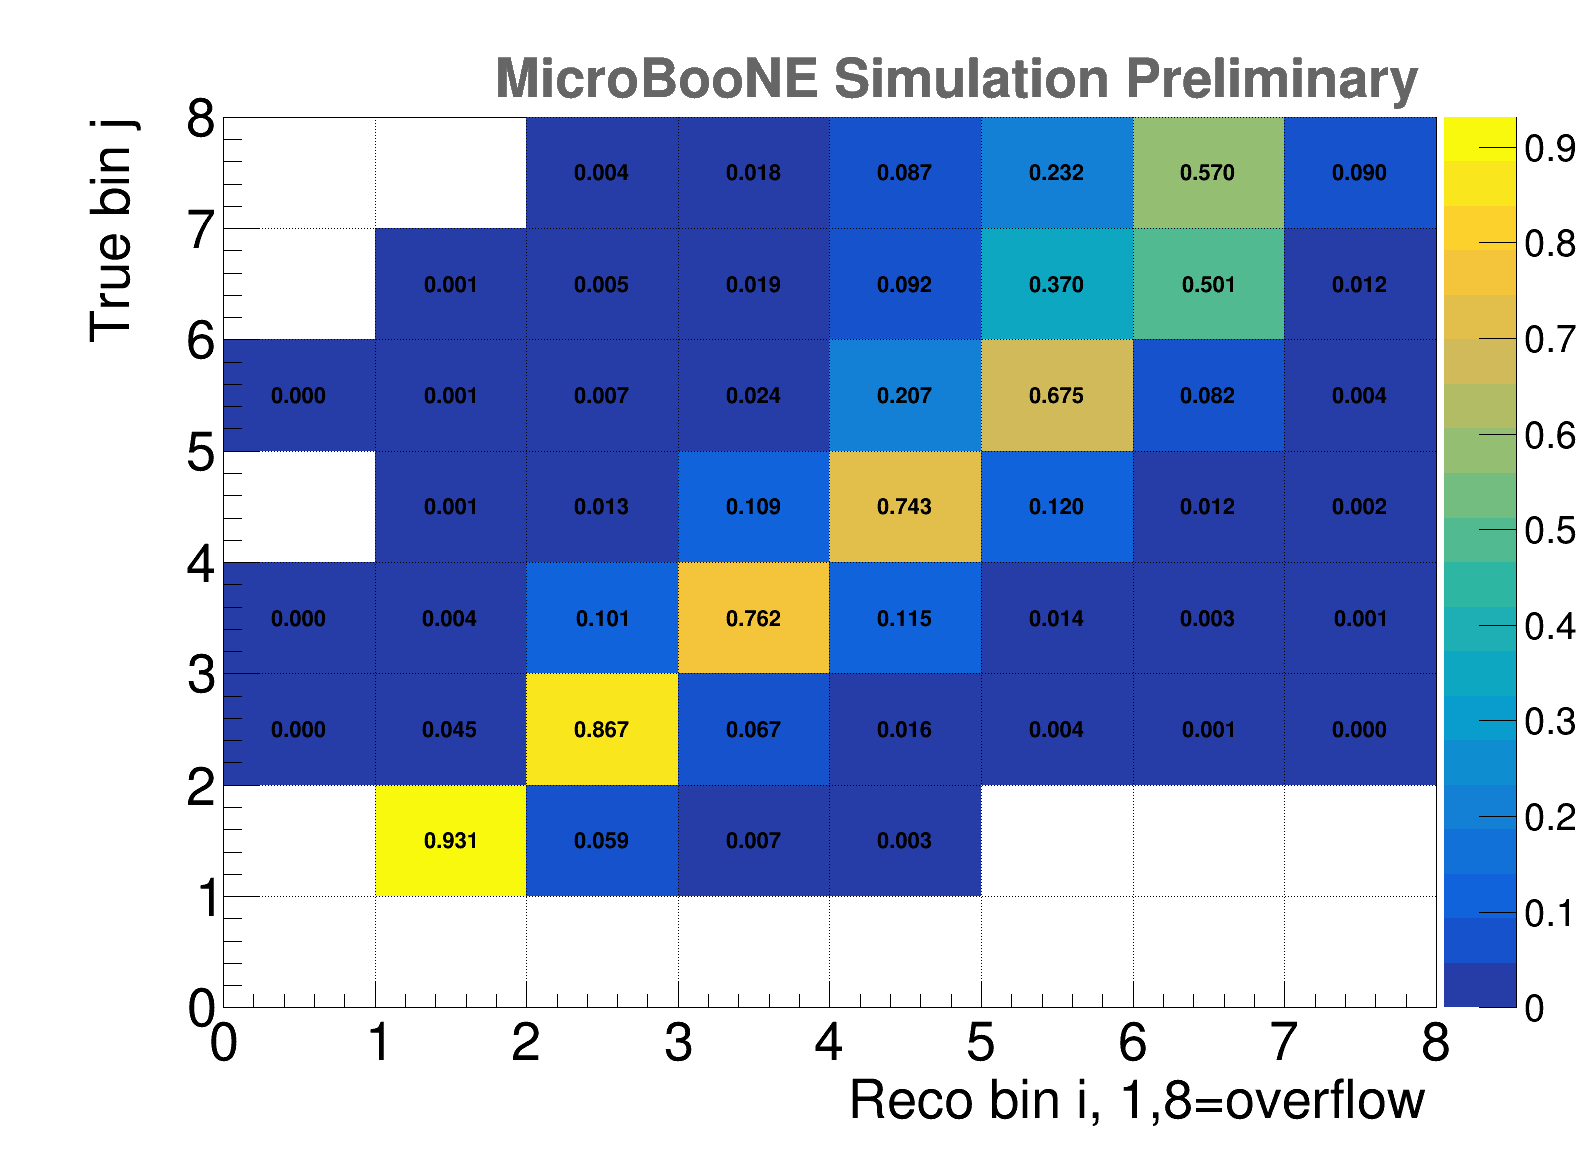

In [23]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0,0.0,0.0]
mitigation_matrix = np.zeros((8,8))
for j in range(0,binnum+2):
    for i in range(0,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j]+=h_migration.GetBinContent(i,j)
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',8,0,8,8,0,8)
for j in range(0,binnum+2):
    for i in range(0,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        mitigation_matrix[i,j]= h_migration.GetBinContent(i,j)/(reco_entries[j]+1e-80)
        h_mitigation_matrix.SetBinContent(i+1,j+1,mitigation_matrix[i,j])
        #print i-1,j-1,mitigation_matrix[i-1,j-1]
        #true_entries[j]+=h_migration.GetBinContent(i,j)
        
#mitigation_matrix = mitigation_matrix.transpose()
print mitigation_matrix
np.save(output_filedir+'migration_matrix_momentum',mitigation_matrix)
h_mitigation_matrix.SetXTitle("Reco bin i, 1,8=overflow")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')
h_mitigation_matrix.GetYaxis().SetTitleSize(0.05)
h_mitigation_matrix.GetYaxis().SetTitleOffset(0.0)
h_mitigation_matrix.GetYaxis().SetLabelSize(0.05)
h_mitigation_matrix.GetXaxis().SetTitleSize(0.05)
h_mitigation_matrix.GetXaxis().SetLabelSize(0.05)
h_mitigation_matrix.GetXaxis().SetTitleOffset(1)
h_mitigation_matrix.SetLineColor(ROOT.kBlack)
h_mitigation_matrix.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_mitigation_matrix.png")
c1.SaveAs(globale.outputdir_root + "h_mitigation_matrix.root")
c1.SaveAs(globale.outputdir_pdf + "h_mitigation_matrix.pdf")

h_mitigation_matrix.Write("h_mitigation_matrix")

In [24]:
# Nselected and N generated
title = 'MCS momentum efficiency'
#weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')

h_init_eff_energy.Write("h_eff_true_energy_z")
h_init_eff_energy_1.Write("h_eff_true_energy_n")

492

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).


290094.446533
279392.036684
161357.273193
158618.57371
0.556223240816
0.567727611683


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_pass_smearing.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_pass_smearing.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_pass_smearing.pdf has been created


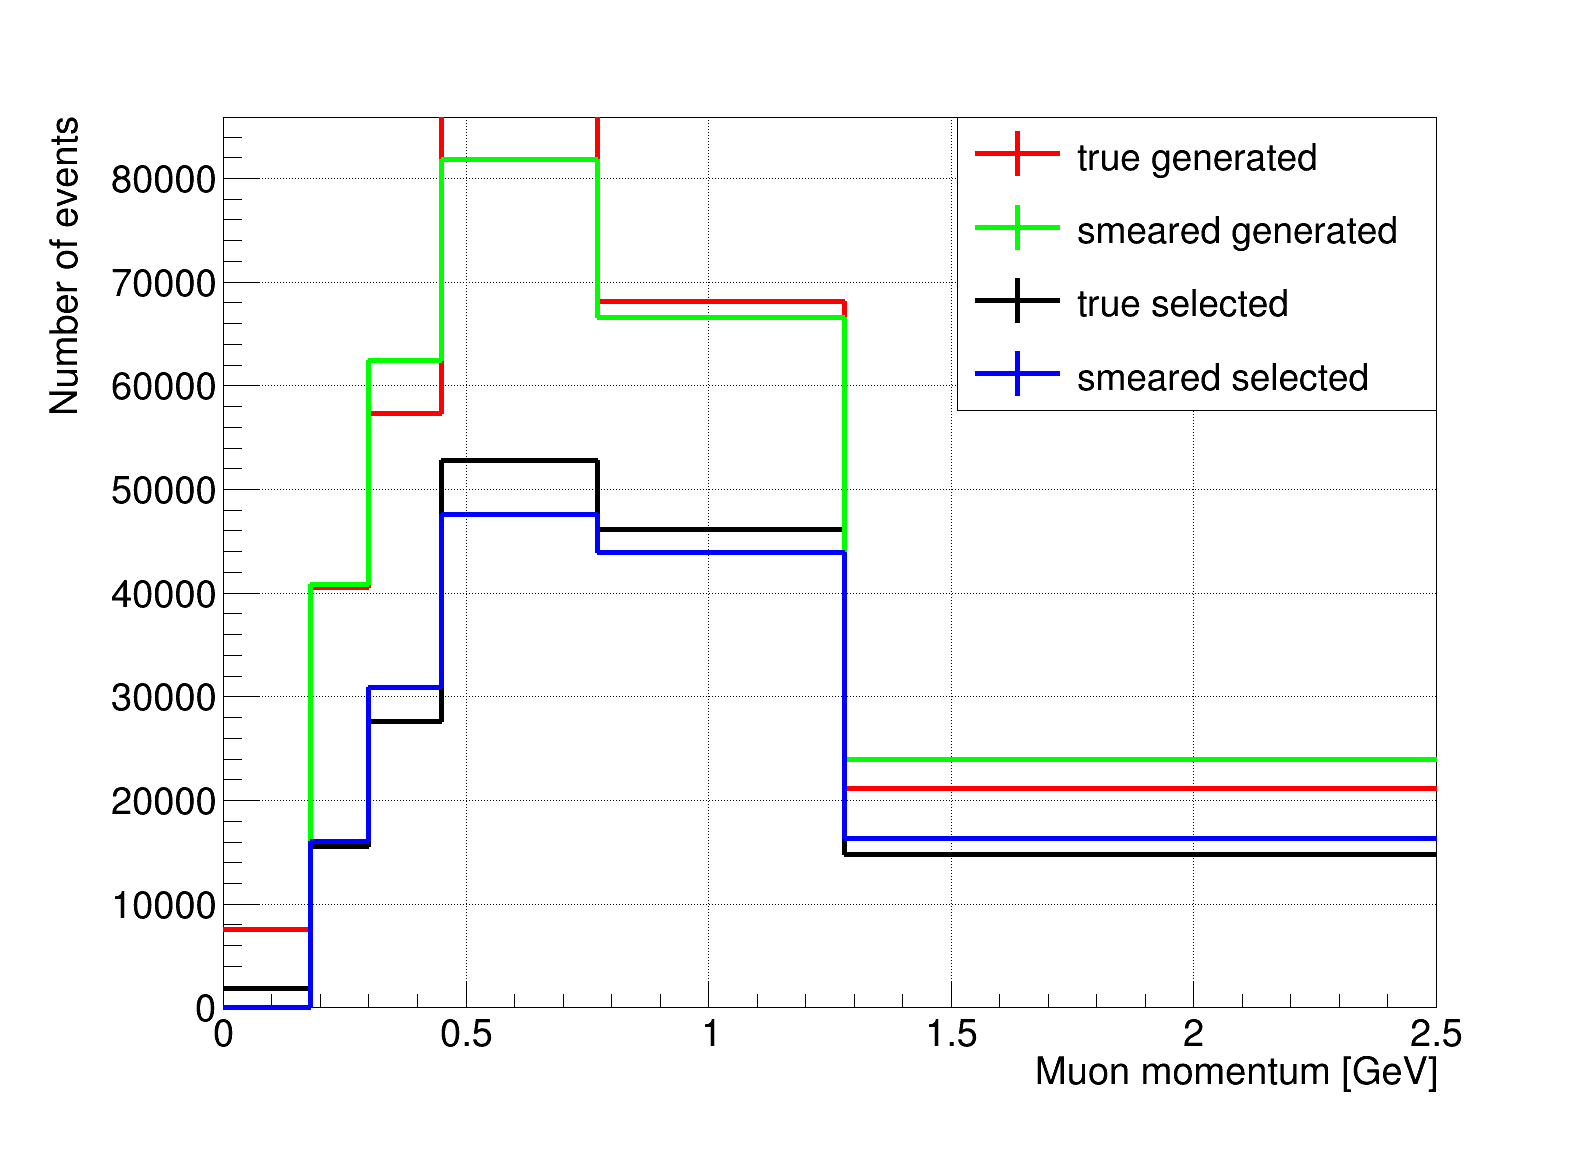

In [25]:
h_init_eff_energy_1.SetLineWidth(5)
h_init_eff_energy_1.SetLineColor(ROOT.kRed)
h_init_eff_energy_1.SetMinimum(0)
h_init_eff_energy.SetLineWidth(5)
h_init_eff_energy.SetLineColor(ROOT.kBlack)


gen_smeared = np.zeros((8))
sel_smeared = np.zeros((8))
for i in range(1,binnum+1):
    gen_smeared[i-1] = h_init_eff_energy_1.GetBinContent(i)
    sel_smeared[i-1] = h_init_eff_energy.GetBinContent(i)
gen_smeared = mitigation_matrix.dot(gen_smeared)
sel_smeared = mitigation_matrix.dot(sel_smeared)

h_init_eff_energy_1_sm = h_init_eff_energy_1.Clone()
h_init_eff_energy_sm = h_init_eff_energy_1.Clone()

for i in range(1,binnum+1):
    h_init_eff_energy_1_sm.SetBinContent(i,gen_smeared[i-1])
    h_init_eff_energy_sm.SetBinContent(i,sel_smeared[i-1])
    
h_init_eff_energy_1_sm.SetLineWidth(5)
h_init_eff_energy_1_sm.SetLineColor(ROOT.kGreen)
h_init_eff_energy_1_sm.SetMinimum(0)
h_init_eff_energy_sm.SetLineWidth(5)
h_init_eff_energy_sm.SetLineColor(ROOT.kBlue)

legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
legend.AddEntry(h_init_eff_energy_1,'true generated',"lep");
legend.AddEntry(h_init_eff_energy_1_sm,'smeared generated',"lep");
legend.AddEntry(h_init_eff_energy,'true selected',"lep");
legend.AddEntry(h_init_eff_energy_sm,'smeared selected',"lep");

h_init_eff_energy_1_sm.SetXTitle("Muon momentum [GeV]")
h_init_eff_energy_1_sm.SetYTitle("Number of events")

h_init_eff_energy_1_sm.Draw('hist')

h_init_eff_energy_1.Draw('same hist')
h_init_eff_energy.Draw('same hist')
h_init_eff_energy_1_sm.Draw('same hist')
h_init_eff_energy_sm.Draw('same hist')
legend.Draw()

print h_init_eff_energy_1.Integral(0,binnum+2)
print h_init_eff_energy_1_sm.Integral(0,binnum+2)

print h_init_eff_energy.Integral(0,binnum+2)
print h_init_eff_energy_sm.Integral(0,binnum+2)

print h_init_eff_energy.Integral(0,binnum+2)/h_init_eff_energy_1.Integral(0,binnum+2)
print h_init_eff_energy_sm.Integral(0,binnum+2)/h_init_eff_energy_1_sm.Integral(0,binnum+2)

c1.Draw()

c1.SaveAs(globale.outputdir_png + "h_pass_smearing.png")
c1.SaveAs(globale.outputdir_root + "h_pass_smearing.root")
c1.SaveAs(globale.outputdir_pdf + "h_pass_smearing.pdf")

In [26]:
# e tilde
N_sel = np.zeros((8))
N_gen = np.zeros((8))
for i in range(0,binnum+2):
    N_sel[i] = h_init_eff_energy.GetBinContent(i)
    N_gen[i] = h_init_eff_energy_1.GetBinContent(i)
    print N_sel[i],N_gen[i],N_sel[i]/N_gen[i]
eff_tilde = np.zeros((8))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
print eff_tilde
np.save(output_filedir+'eff_tilde_momentum_xsec_CV',eff_tilde)
print output_filedir

0.0 0.0 nan
1834.276123046875 7589.15380859375 0.24169705467950733
15604.9345703125 40553.8359375 0.38479552450629384
27612.171875 57328.19140625 0.481650845730146
52833.2109375 91583.0 0.5768888433169912
46164.796875 68130.328125 0.6775953990754393
14797.4921875 21196.693359375 0.6981038002776634
2510.390625 3713.243896484375 0.6760640278374355
[0.51997684 0.28283745 0.40558926 0.50042628 0.58700453 0.66035199
 0.68098174 0.65791122]
/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


In [27]:
h_eff = h_init_eff_energy.Clone()
h_eff.Divide(h_init_eff_energy_1)

True

465

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_eff_tilde_xsecMom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_eff_tilde_xsecMom.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_eff_tilde_xsecMom.pdf has been created


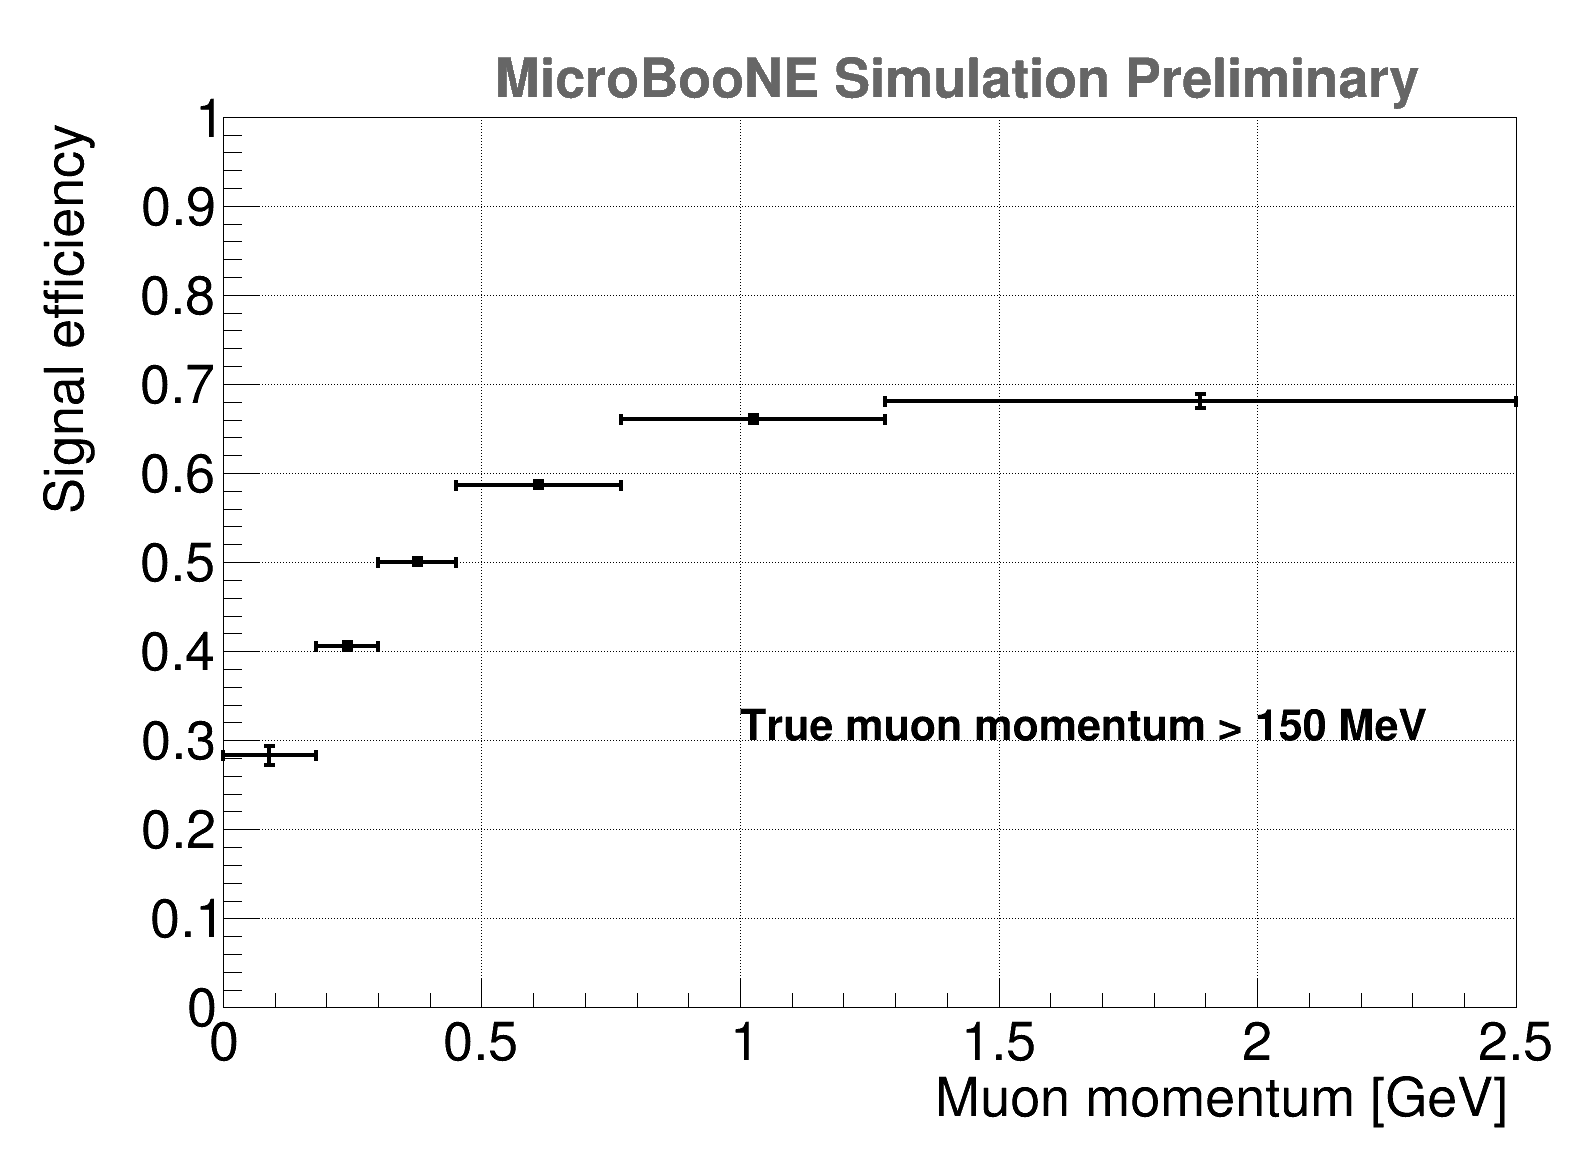

In [28]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+1):
    h_eff_tilde.SetBinContent(i,eff_tilde[i])
    h_eff_tilde.SetBinError(i,h_eff.GetBinError(i))
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)

h_eff_tilde.SetXTitle("Muon momentum [GeV]")
h_eff_tilde.SetYTitle("Signal efficiency")
h_eff_tilde.GetYaxis().SetTitleSize(0.05)
h_eff_tilde.GetYaxis().SetTitleOffset(0.0)
h_eff_tilde.GetYaxis().SetLabelSize(0.05)
h_eff_tilde.GetXaxis().SetTitleSize(0.05)
h_eff_tilde.GetXaxis().SetLabelSize(0.05)
h_eff_tilde.GetXaxis().SetTitleOffset(1)
h_eff_tilde.SetLineColor(ROOT.kBlack)
h_eff_tilde.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_eff_tilde.Draw('E1')
prelim = draw_sim()
prelim.Draw()
t = ROOT.TLatex(1,0.3,"True muon momentum > 150 MeV");
t.SetTextFont(62);
t.SetTextSize(1/25.);
t.Draw();
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_tilde_xsecMom.png")
c1.SaveAs(globale.outputdir_root + "h_eff_tilde_xsecMom.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_tilde_xsecMom.pdf")

h_eff_tilde.Write("h_eff_tilde")

In [29]:
#weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'TrackMomMCS_mom'
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
#h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
h_signal = ROOT.TH1F("h_signal",'h_signal',binnum,array('f',mom_bins))
#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

h_data_r = ROOT.TH1F("h_data_r",'h_data_r',binnum,array('f',mom_bins))
h_ext_r = ROOT.TH1F("h_ext_r",'h_ext_r',binnum,array('f',mom_bins))
#h_dirt_r = ROOT.TH1F("h_dirt_r",'h_dirt_r',binnum,array('f',mom_bins))
h_overlay_r = ROOT.TH1F("h_overlay_r",'h_overlay_r',binnum,array('f',mom_bins))
h_signal_r = ROOT.TH1F("h_signal_r",'h_signal_r',binnum,array('f',mom_bins))

globale.data_out.Draw(variable+'>>h_data',cut+' && track_end_uncontained','')
globale.ext_out.Draw(variable+'>>h_ext',cut+' && track_end_uncontained','')
#globale.dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+ '&& track_end_uncontained)','')
globale.overlay_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !numu_signal && track_end_uncontained)','')
globale.overlay_out.Draw(variable+'>>h_signal',weight_name+'*('+cut+'&& numu_signal && track_end_uncontained)','')

globale.data_out.Draw('TrackMomRange_mu'+'>>h_data_r',cut+' && !track_end_uncontained','')
globale.ext_out.Draw('TrackMomRange_mu'+'>>h_ext_r',cut+' && !track_end_uncontained','')
#globale.dirt_out.Draw('TrackMomRange_mu'+'>>h_dirt_r',weight_name+'*('+cut+ '&& !track_end_uncontained)','')
globale.overlay_out.Draw('TrackMomRange_mu'+'>>h_overlay_r',weight_name+'*('+cut+'&& !numu_signal && !track_end_uncontained)','')
globale.overlay_out.Draw('TrackMomRange_mu'+'>>h_signal_r',weight_name+'*('+cut+'&& numu_signal && !track_end_uncontained)','')

h_data.Add(h_data_r)
h_ext.Add(h_ext_r)
#h_dirt.Add(h_dirt_r)
h_overlay.Add(h_overlay_r)
h_signal.Add(h_signal_r)

h_true = ROOT.TH1F("h_true",'h_true',binnum,array('f',mom_bins))
globale.overlay_out.Draw(variable+'>>h_true',weight_name+'*(numu_true && track_end_uncontained)','')
h_true_r = ROOT.TH1F("h_true_r",'h_true_r',binnum,array('f',mom_bins))
globale.overlay_out.Draw('TrackMomRange_mu'+'>>h_true_r',weight_name+'*(numu_true && !track_end_uncontained)','')
h_true.Add(h_true_r)

True

In [30]:
from uncertainties import ufloat
from uncertainties.umath import *  

In [31]:
#lat = np.zeros(8,binnum)
for i in range(1,binnum+1):
    #print 'Entries in bin ',i,'-------------------------------------------------------------'
    n_da = h_data.GetBinContent(i)
    err_da = math.sqrt(n_da)
    n_ext = h_ext.GetBinContent(i)
    err_ext = math.sqrt(n_ext)
    #n_dirt = h_dirt.GetBinContent(i)
    #err_dirt = math.sqrt(n_dirt)
    n_ov = h_overlay.GetBinContent(i)
    err_ov = math.sqrt(n_ov)
    n_sig = h_signal.GetBinContent(i)
    err_sig = math.sqrt(n_sig)
    #print 'data: ',n_da, ' +- ',err_da,' Ext: ',n_ext,' +- ',err_ext,\
    #' Dirt: ',n_dirt,' +- ', err_dirt,' Overlay: ',n_ov,' +- ',err_ov,' Signal: ',n_sig,' +- ',err_sig
    #print ''
    print i,' & {0:0.2f}'.format(n_da*scale[data]), ' $\pm$ {0:0.2f}'.format(err_da*scale[data]),\
        ' & {0:0.2f}'.format(n_ext*scale[ext]),' $\pm$ {0:0.2f}'.format(err_ext*scale[ext]),\
        ' & {0:0.2f}'.format(n_ov*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_ov*scale[overlay]),\
        ' & {0:0.2f}'.format(n_ext*scale[ext]+n_ov*scale[overlay]), ' $\pm$ {0:0.2f}'.format(math.sqrt(err_ext*err_ext*scale[ext]*scale[ext] +err_ov*err_ov*scale[overlay]*scale[overlay])),\
        ' & {0:0.2f}'.format(n_sig*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_sig*scale[overlay]),\
        ' & {0:0.2f}'.format(n_da - (n_ext*scale[ext]+n_ov*scale[overlay])), ' $\pm$ {0:0.2f}'.format( math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext]  + err_ov*err_ov*scale[overlay]*scale[overlay]))
    
print ''
 

print 'For total cross section'
n_da = h_data.Integral(0,binnum+1)
err_da = math.sqrt(n_da)
n_ext = h_ext.Integral(0,binnum+1)
err_ext = math.sqrt(n_ext)
#n_dirt = h_dirt.Integral(0,binnum+1)
#err_dirt = math.sqrt(n_dirt)
n_ov = h_overlay.Integral(0,binnum+1)
err_ov = math.sqrt(n_ov)
n_sig = h_signal.Integral(0,binnum+1)
err_sig = math.sqrt(n_sig)

n_true = h_true.Integral(0,binnum+1)
err_true = math.sqrt(n_true)

data_u = ufloat(n_da, err_da)*scale[data]
ext_u = ufloat(n_ext, err_ext)*scale[ext]
#dirt_u = ufloat(n_dirt, err_dirt)*scale[dirt]
overlay_u = ufloat(n_ov, err_ov)*scale[overlay]
sig_u = ufloat(n_sig, err_sig)*scale[overlay]
true_u = ufloat(n_true, err_true)*scale[overlay]
eff_u = sig_u/true_u

xsec = (data_u - (ext_u+overlay_u))/(eff_u*beam_flux*N_tot)# 

print i,' & {0:0.2f}'.format(n_da*scale[data]), ' $\pm$ {0:0.2f}'.format(err_da*scale[data]),\
        ' & {0:0.2f}'.format(n_ext*scale[ext]),' $\pm$ {0:0.2f}'.format(err_ext*scale[ext]),\
        ' & {0:0.2f}'.format(n_ov*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_ov*scale[overlay]),\
        ' & {0:0.2f}'.format(n_sig*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_sig*scale[overlay]),\
        ' & {0:0.2f}'.format(n_da - (n_ext*scale[ext]+n_ov*scale[overlay])), ' $\pm$ {0:0.2f}'.format( math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_ov*err_ov*scale[overlay]*scale[overlay]))
   


1  & 37.00  $\pm$ 6.08  & 5.03  $\pm$ 0.70  & 20.44  $\pm$ 0.35  & 25.47  $\pm$ 0.78  & 15.84  $\pm$ 0.31  & 11.53  $\pm$ 6.13
2  & 221.00  $\pm$ 14.87  & 33.20  $\pm$ 1.79  & 69.23  $\pm$ 0.65  & 102.42  $\pm$ 1.91  & 105.62  $\pm$ 0.80  & 118.58  $\pm$ 14.99
3  & 298.00  $\pm$ 17.26  & 52.75  $\pm$ 2.26  & 54.39  $\pm$ 0.57  & 107.13  $\pm$ 2.33  & 176.59  $\pm$ 1.03  & 190.87  $\pm$ 17.42
4  & 496.00  $\pm$ 22.27  & 40.26  $\pm$ 1.97  & 36.24  $\pm$ 0.47  & 76.50  $\pm$ 2.03  & 324.70  $\pm$ 1.40  & 419.50  $\pm$ 22.36
5  & 251.00  $\pm$ 15.84  & 9.10  $\pm$ 0.94  & 14.30  $\pm$ 0.29  & 23.40  $\pm$ 0.98  & 265.15  $\pm$ 1.26  & 227.60  $\pm$ 15.87
6  & 43.00  $\pm$ 6.56  & 1.84  $\pm$ 0.42  & 4.69  $\pm$ 0.17  & 6.53  $\pm$ 0.45  & 80.53  $\pm$ 0.70  & 36.47  $\pm$ 6.57

For total cross section
6  & 1348.00  $\pm$ 36.72  & 142.18  $\pm$ 3.71  & 199.81  $\pm$ 1.10  & 972.63  $\pm$ 2.42  & 1006.01  $\pm$ 36.92


In [32]:
xsec

7.814474257031012e-39+/-2.877991458293093e-40

In [33]:
print xsec
print 'Result = {:10.3g}'.format(xsec*1e38)

(7.81+/-0.29)e-39
Result =      0.781+/-     0.029


In [34]:

h_data.Sumw2()
h_ext.Sumw2()
#h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(globale.scale[globale.data])
h_ext.Scale(globale.scale[globale.ext])
#h_dirt.Scale(globale.scale[globale.dirt])
h_overlay.Scale(globale.scale[globale.overlay])

h_data.Write("h_data")
h_ext.Write("h_ext")
#h_dirt.Write("h_dirt")
h_overlay.Write("h_overlay")

444

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [35]:
print h_overlay.GetSumOfWeights()
h_data.Add(h_ext,-1)
#h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

199.28455925
1004.53640747


In [36]:
h_overlay_sig = ROOT.TH1F("h_overlay_sig",'h_overlay',binnum,array('f',mom_bins))
globale.overlay_out.Draw(variable+'>>h_overlay_sig',weight_name+'*('+cut+'&& numu_signal && track_end_uncontained)','')
h_overlay_sig_r = ROOT.TH1F("h_overlay_sig_r",'h_overlay_sig_r',binnum,array('f',mom_bins))
globale.overlay_out.Draw('TrackMomRange_mu'+'>>h_overlay_sig_r',weight_name+'*('+cut+'&& numu_signal && !track_end_uncontained)','')
h_overlay_sig.Add(h_overlay_sig_r)
h_overlay_sig.Scale(globale.scale[globale.overlay])

# MCle_Energy:TrackMomMCS_mom
h_true = ROOT.TH1F("h_true",'h_true',binnum,array('f',mom_bins))
globale.overlay_out.Draw('MCle_Energy'+'>>h_true',weight_name+'*(numu_true)','')
h_true.Scale(globale.scale[globale.overlay])
h_true.SetLineColor(ROOT.kOrange)
h_true.SetLineWidth(4)

Warning in <TFile::Append>: Replacing existing TH1: h_true (Potential memory leak).


456

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_data_bkgsubtracted.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_data_bkgsubtracted.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_data_bkgsubtracted.pdf has been created


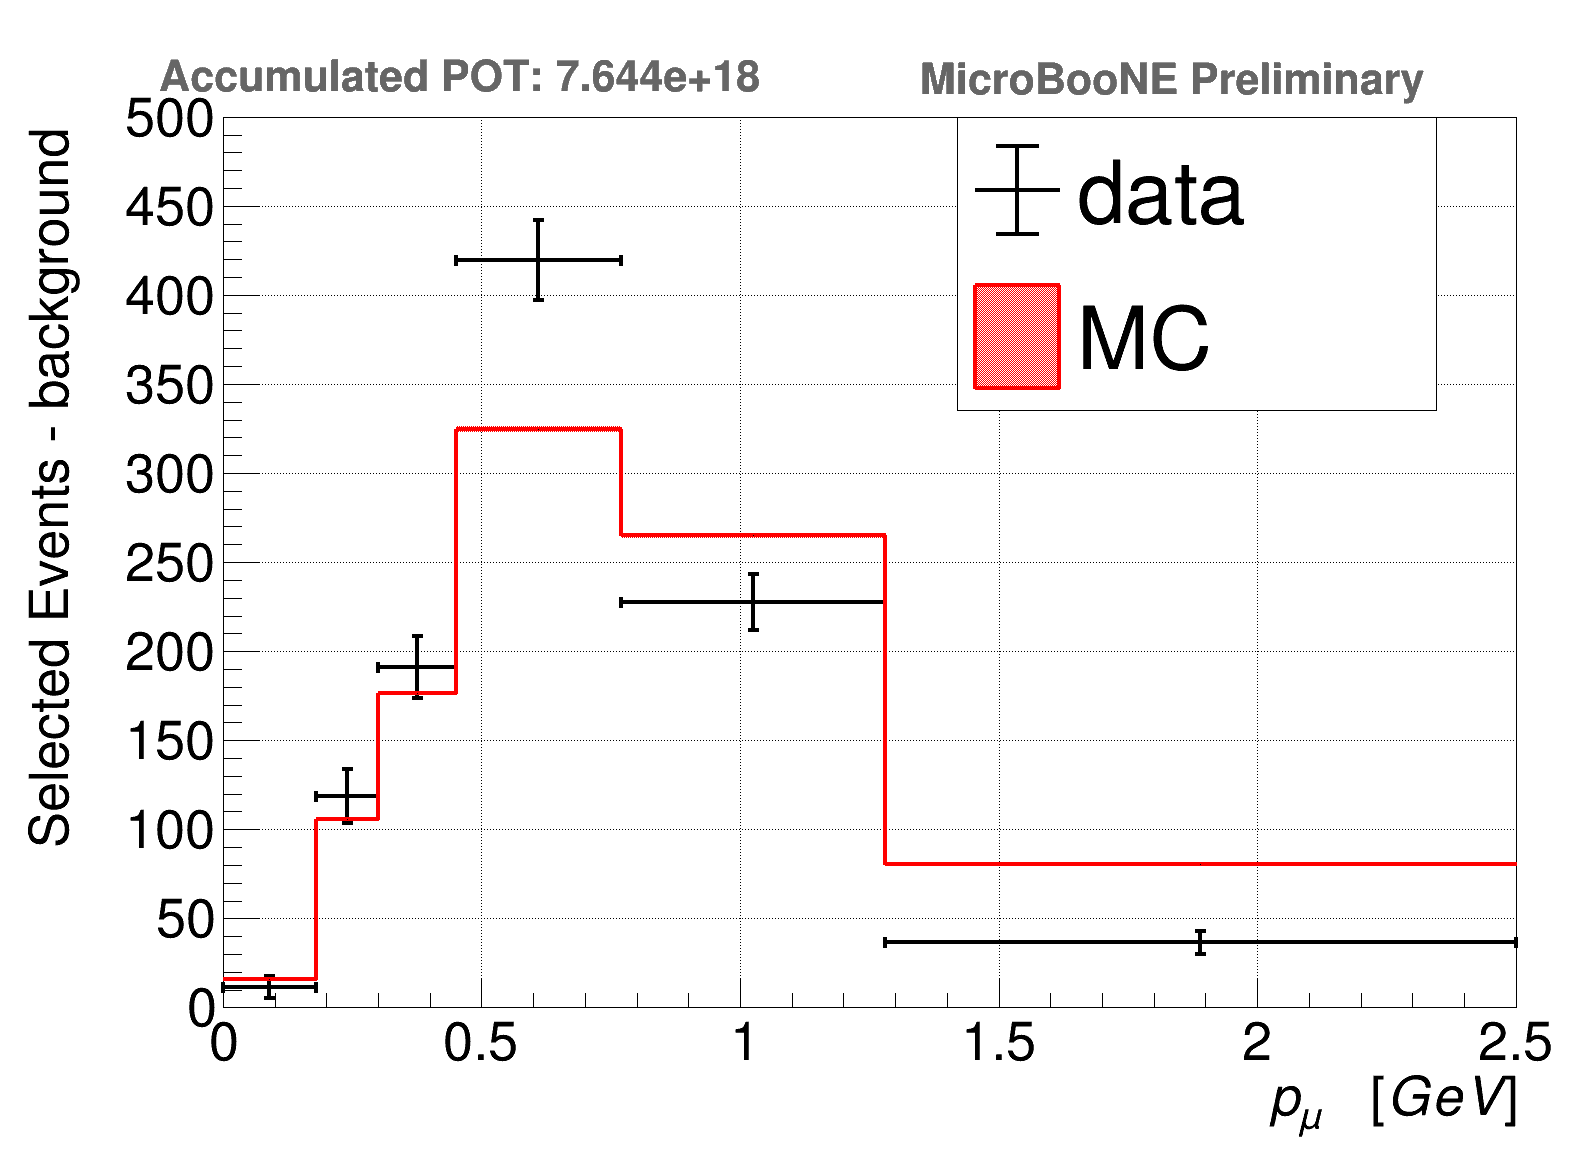

In [37]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("Selected Events - background")
h_data.SetXTitle("p_{\mu} \t [GeV]")
h_data.SetLineWidth(3)
h_data.SetMaximum(500)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_data_bkgsubtracted.png")
c1.SaveAs(globale.outputdir_root + "h_data_bkgsubtracted.root")
c1.SaveAs(globale.outputdir_pdf + "h_data_bkgsubtracted.pdf")

h_data.Write("h_data_bkgsubtracted")
h_overlay_sig.Write("h_MC_bkgsubtracted")

In [38]:
h_true_smeare = h_true.Clone()
true_bins = np.zeros((binnum+2))
for i in range(0,binnum+2):
    true_bins[i] = h_true.GetBinContent(i)
    
true_bins_smeared = np.zeros((binnum+2))

true_bins_smeared = mitigation_matrix.dot(true_bins)
#sel_smeared = mitigation_matrix.dot(sel_smeared)


for i in range(1,binnum+1):
    h_true_smeare.SetBinContent(i,true_bins_smeared[i-1])
    print true_bins_smeared[i-1]
h_true_smeare.SetLineColor(ROOT.kGreen)
h_true_smeare.SetLineWidth(4)

0.06755275638469908
56.01283685916074
260.41796821330104
352.8893649839489
553.1461518391134
401.53007904706476


In [39]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux*1e-38))

h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux*1e-38))

h_true.Scale(1.0/(N_tot*beam_flux*1e-38))
h_true_smeare.Scale(1.0/(N_tot*beam_flux*1e-38))

In [40]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))
    h_data.SetBinError(i,h_data.GetBinError(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinError(i,h_overlay_sig.GetBinError(i)/h_overlay_sig.GetBinWidth(i))
    h_true.SetBinContent(i,h_true.GetBinContent(i)/h_true.GetBinWidth(i))
    h_true.SetBinError(i,h_true.GetBinError(i)/h_true.GetBinWidth(i))
    h_true_smeare.SetBinContent(i,h_true_smeare.GetBinContent(i)/h_true_smeare.GetBinWidth(i))
    h_true_smeare.SetBinError(i,h_true_smeare.GetBinError(i)/h_true_smeare.GetBinWidth(i))

    print h_true_smeare.GetBinContent(i)/h_true_smeare.GetBinWidth(i)

0.000900837893295
1.68063596663
5.00077366841
1.48897463059
0.918857624369
0.116559335152


441

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_data_bkgsubtracted_binwidth.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_data_bkgsubtracted_binwidth.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_data_bkgsubtracted_binwidth.pdf has been created


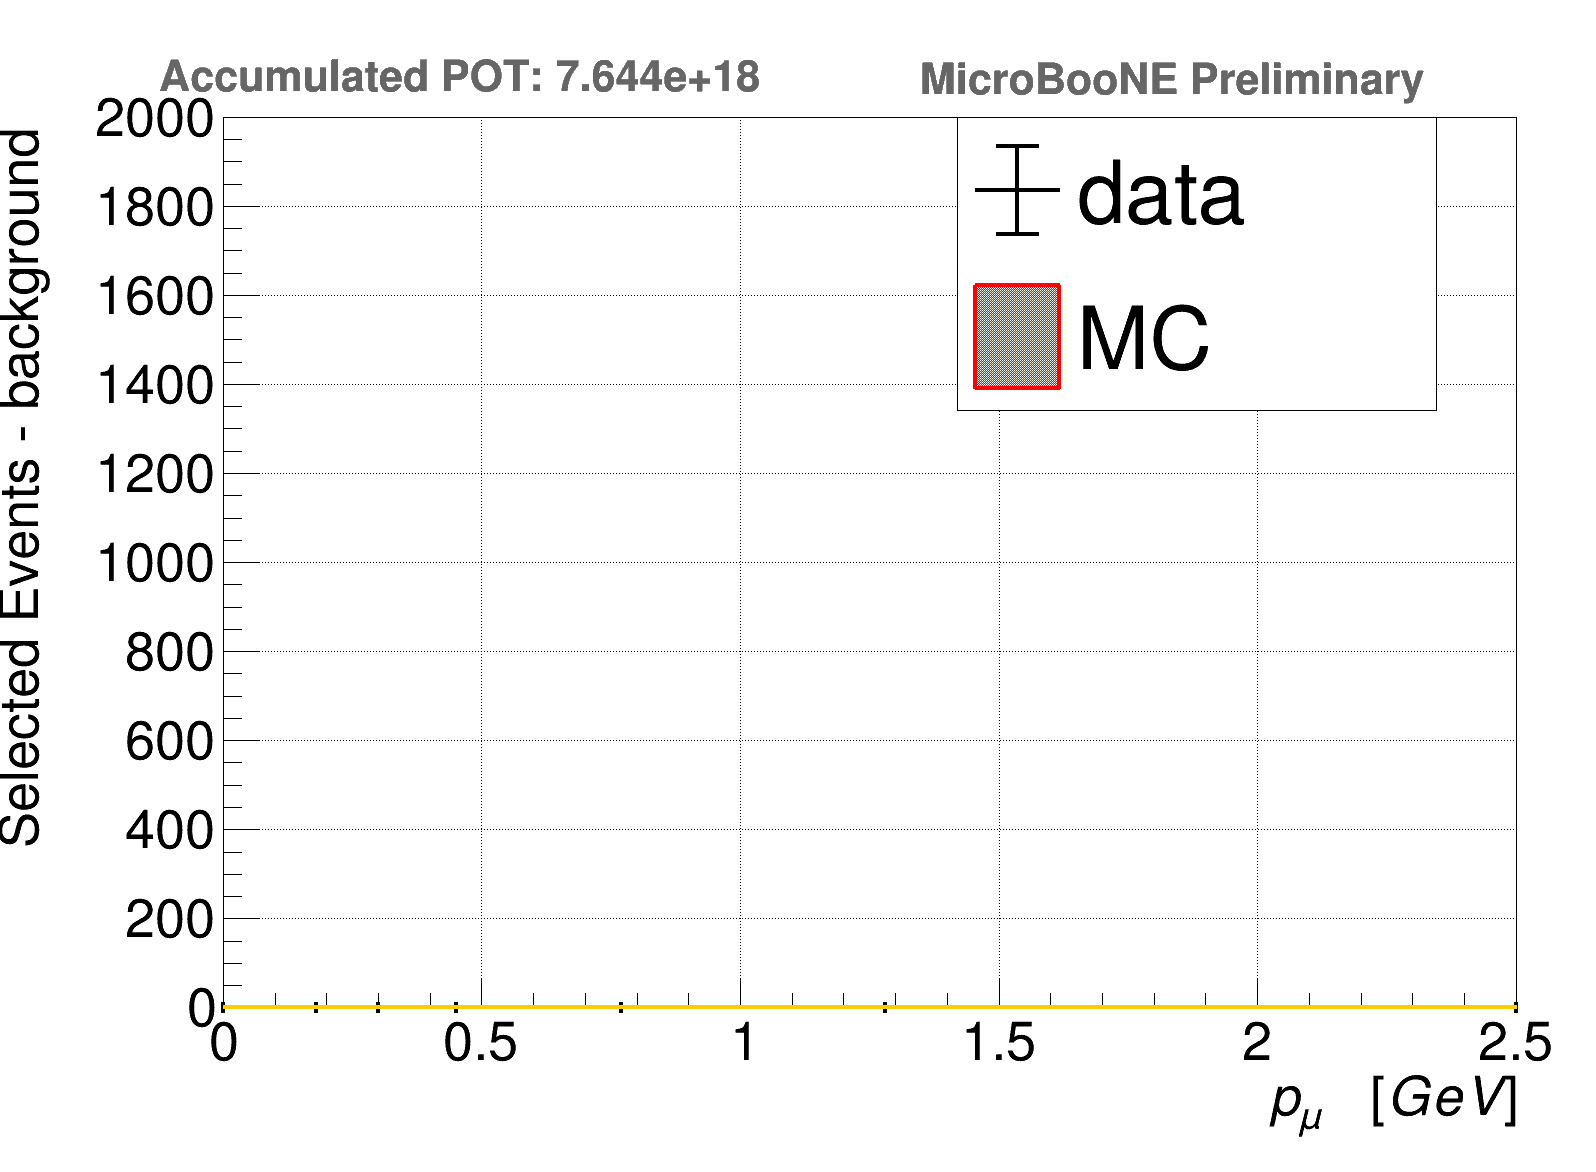

In [41]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("Selected Events - background")
h_data.SetXTitle("p_{\mu} \t [GeV]")
h_data.SetLineWidth(3)
h_data.SetMaximum(2000)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
h_true.Draw('hist same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_data_bkgsubtracted_binwidth.png")
c1.SaveAs(globale.outputdir_root + "h_data_bkgsubtracted_binwidth.root")
c1.SaveAs(globale.outputdir_pdf + "h_data_bkgsubtracted_binwidth.pdf")

h_data.Write("h_data_bkgsubtracted_binwidth")
h_overlay_sig.Write("h_MC_bkgsubtracted_binwidth")

In [42]:

h_QE = ROOT.TH1F("h_QE",'h_QE',binnum,array('f',mom_bins))
h_MEC = ROOT.TH1F("h_MEC",'h_MEC',binnum,array('f',mom_bins))
h_RES = ROOT.TH1F("h_RES",'h_RES',binnum,array('f',mom_bins))
h_DIS = ROOT.TH1F("h_DIS",'h_DIS',binnum,array('f',mom_bins))

globale.overlay_out.Draw(variable+'>>h_QE',weight_name+'*('+cut+'&& numu_signal && MCNu_Interaction==0)','')
globale.overlay_out.Draw(variable+'>>h_MEC',weight_name+'*('+cut+'&& numu_signal && MCNu_Interaction==10)','')
globale.overlay_out.Draw(variable+'>>h_RES',weight_name+'*('+cut+'&& numu_signal && MCNu_Interaction==1)','')
globale.overlay_out.Draw(variable+'>>h_DIS',weight_name+'*('+cut+'&& numu_signal && MCNu_Interaction==2)','')

list_histo = [h_QE,h_MEC,h_RES,h_DIS]

for x in list_histo:
    x.Scale(globale.scale[globale.overlay])
    x.Divide(h_eff_tilde)
    x.Scale(1.0/(N_tot*beam_flux*1e-38))
    x.SetLineWidth(4)
    for i in range(1,binnum+1):
        x.SetBinContent(i,x.GetBinContent(i)/x.GetBinWidth(i))
        x.SetBinError(i,x.GetBinError(i)/x.GetBinWidth(i))
        
h_QE.SetLineColor(ROOT.kGreen+2)
h_MEC.SetLineColor(ROOT.kOrange-3)
h_RES.SetLineColor(ROOT.kRed+1)
h_DIS.SetLineColor(ROOT.kBlue+1)



Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_xsec_corr_channel.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_xsec_corr_channel.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_xsec_corr_channel.pdf has been created


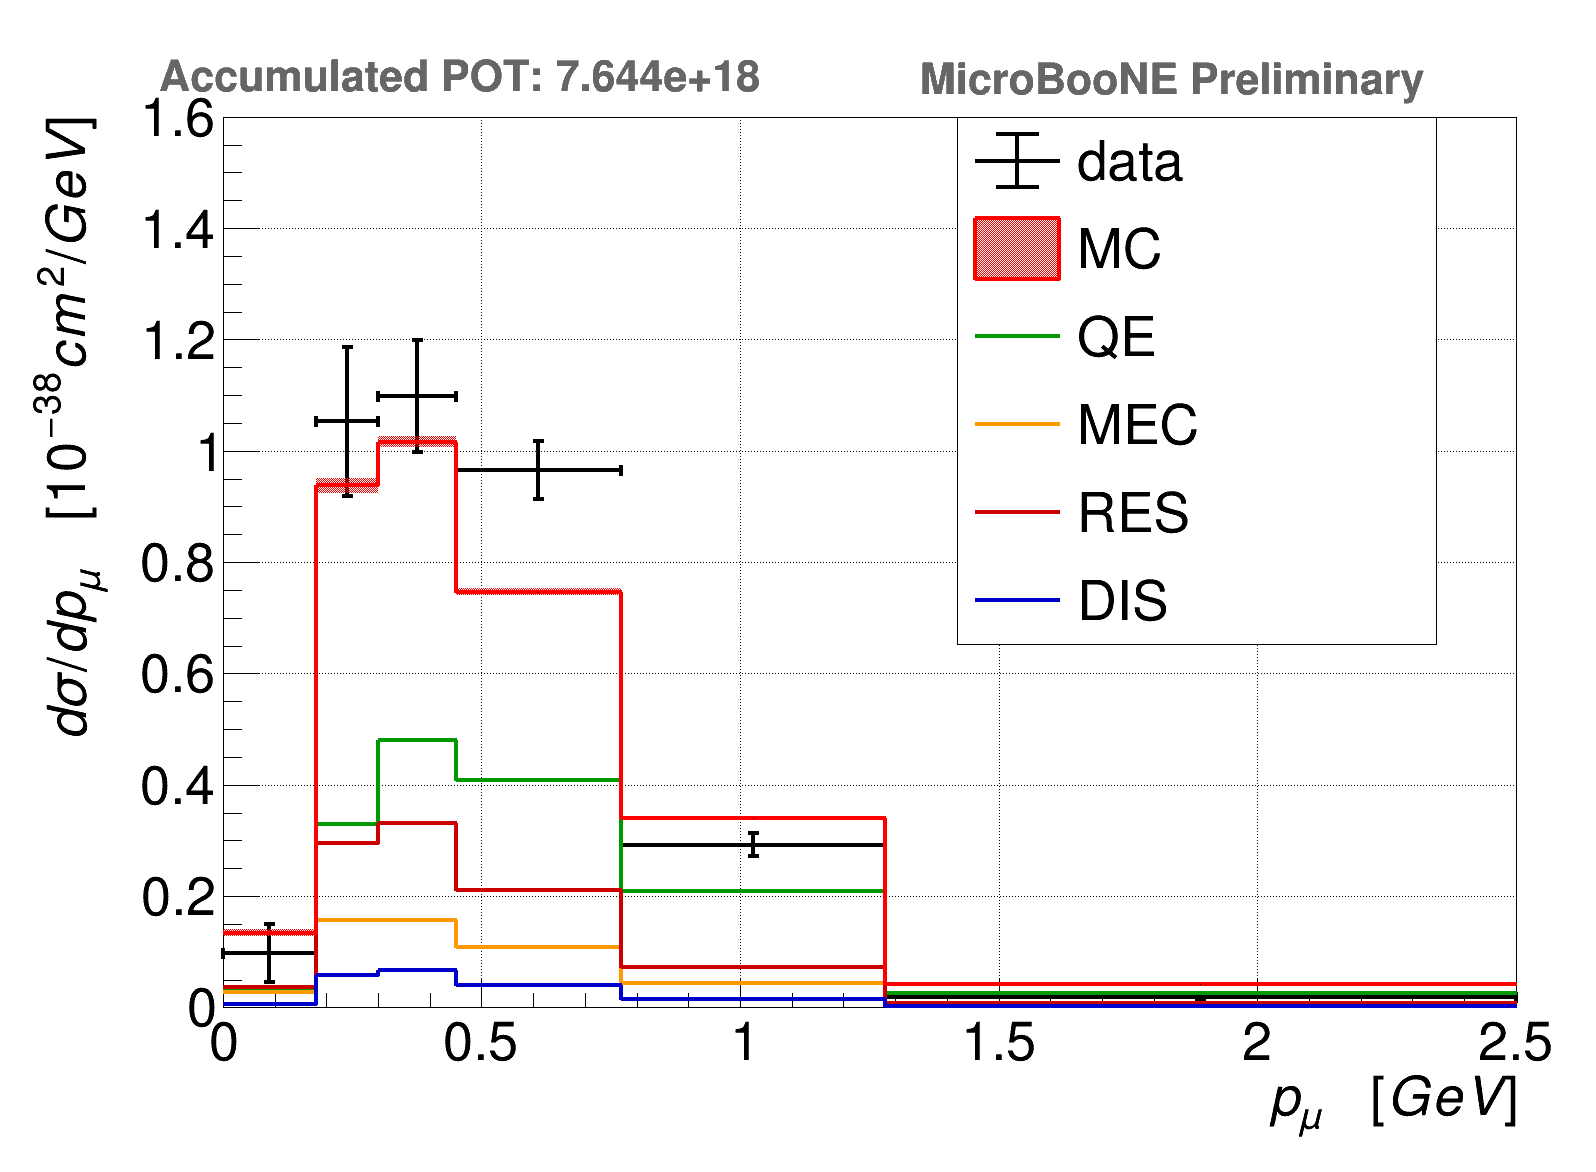

In [43]:
legend = ROOT.TLegend(0.6,0.45,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
legend.AddEntry(h_QE,'QE',"l");
legend.AddEntry(h_MEC,'MEC',"l");
legend.AddEntry(h_RES,'RES',"l");
legend.AddEntry(h_DIS,'DIS',"l");
h_data.SetYTitle("d\sigma / dp_{\mu} \t [10^{-38} cm^{2}/GeV]")
h_data.SetXTitle("p_{\mu} \t [GeV]")
h_data.SetLineWidth(3)
h_data.SetMaximum(1.6)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_QE.Draw('hist same')
h_MEC.Draw('hist same')
h_RES.Draw('hist same')
h_DIS.Draw('hist same')


h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_corr_channel.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_corr_channel.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_corr_channel.pdf")

#h_data.Write("h_xsec_data")
#h_overlay_sig.Write("h_xsec_MC")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_xsec_corr_channel_stacked.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_xsec_corr_channel_stacked.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_xsec_corr_channel_stacked.pdf has been created


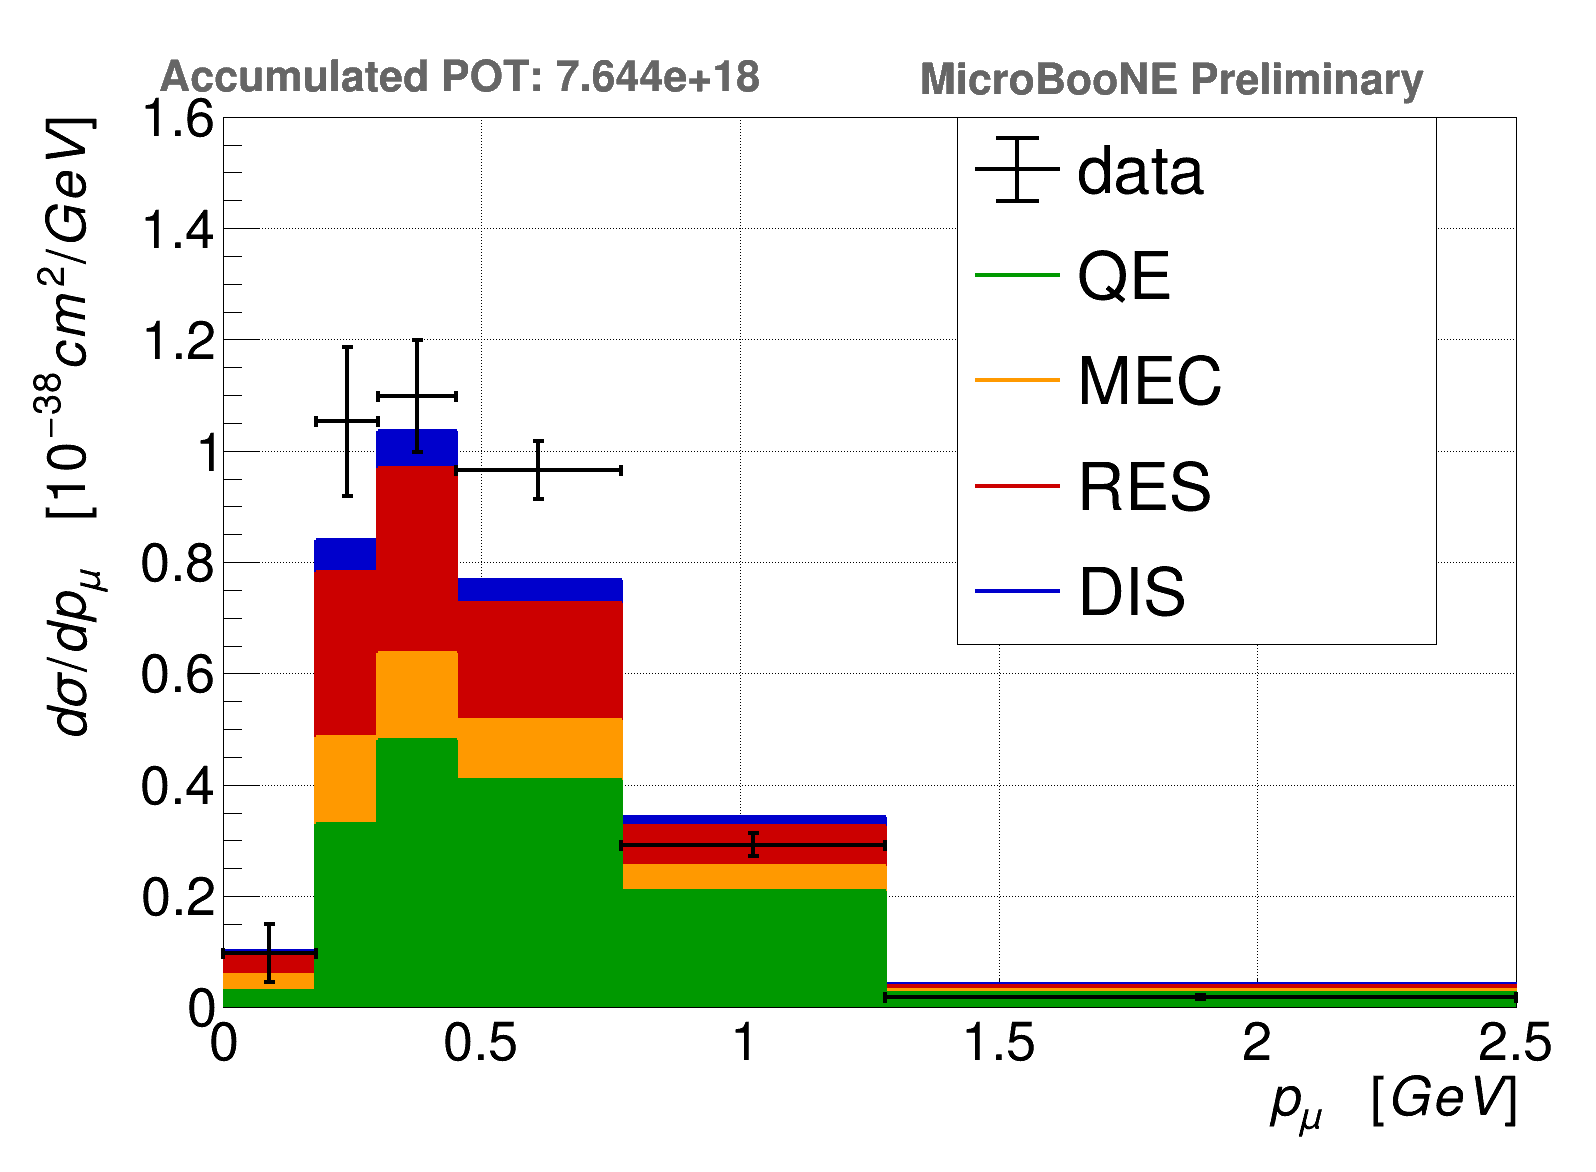

In [44]:
legend = ROOT.TLegend(0.6,0.45,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
#legend.AddEntry(h_overlay_sig,'MC',"f");
legend.AddEntry(h_QE,'QE',"l");
legend.AddEntry(h_MEC,'MEC',"l");
legend.AddEntry(h_RES,'RES',"l");
legend.AddEntry(h_DIS,'DIS',"l");
h_data.SetYTitle("d\sigma / dp_{\mu} \t [10^{-38} cm^{2}/GeV]")
h_data.SetXTitle("p_{\mu} \t [GeV]")
h_data.SetLineWidth(3)
h_data.SetMaximum(1.6)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
hs = ROOT.THStack("hs",'variable'+';'+'axis_name'+'; Entries per bin');
h_DIS.SetFillColor(ROOT.kBlue+1)
h_RES.SetFillColor(ROOT.kRed+1)
h_MEC.SetFillColor(ROOT.kOrange-3)
h_QE.SetFillColor(ROOT.kGreen+2)
hs.Add(h_QE)
hs.Add(h_MEC)
hs.Add(h_RES)
hs.Add(h_DIS)

hs.Draw('hist same')
h_data.Draw('E1 same')

legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_corr_channel_stacked.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_corr_channel_stacked.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_corr_channel_stacked.pdf")

#h_data.Write("h_xsec_data")
#h_overlay_sig.Write("h_xsec_MC")

423

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_xsec_corr.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_xsec_corr.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_xsec_corr.pdf has been created


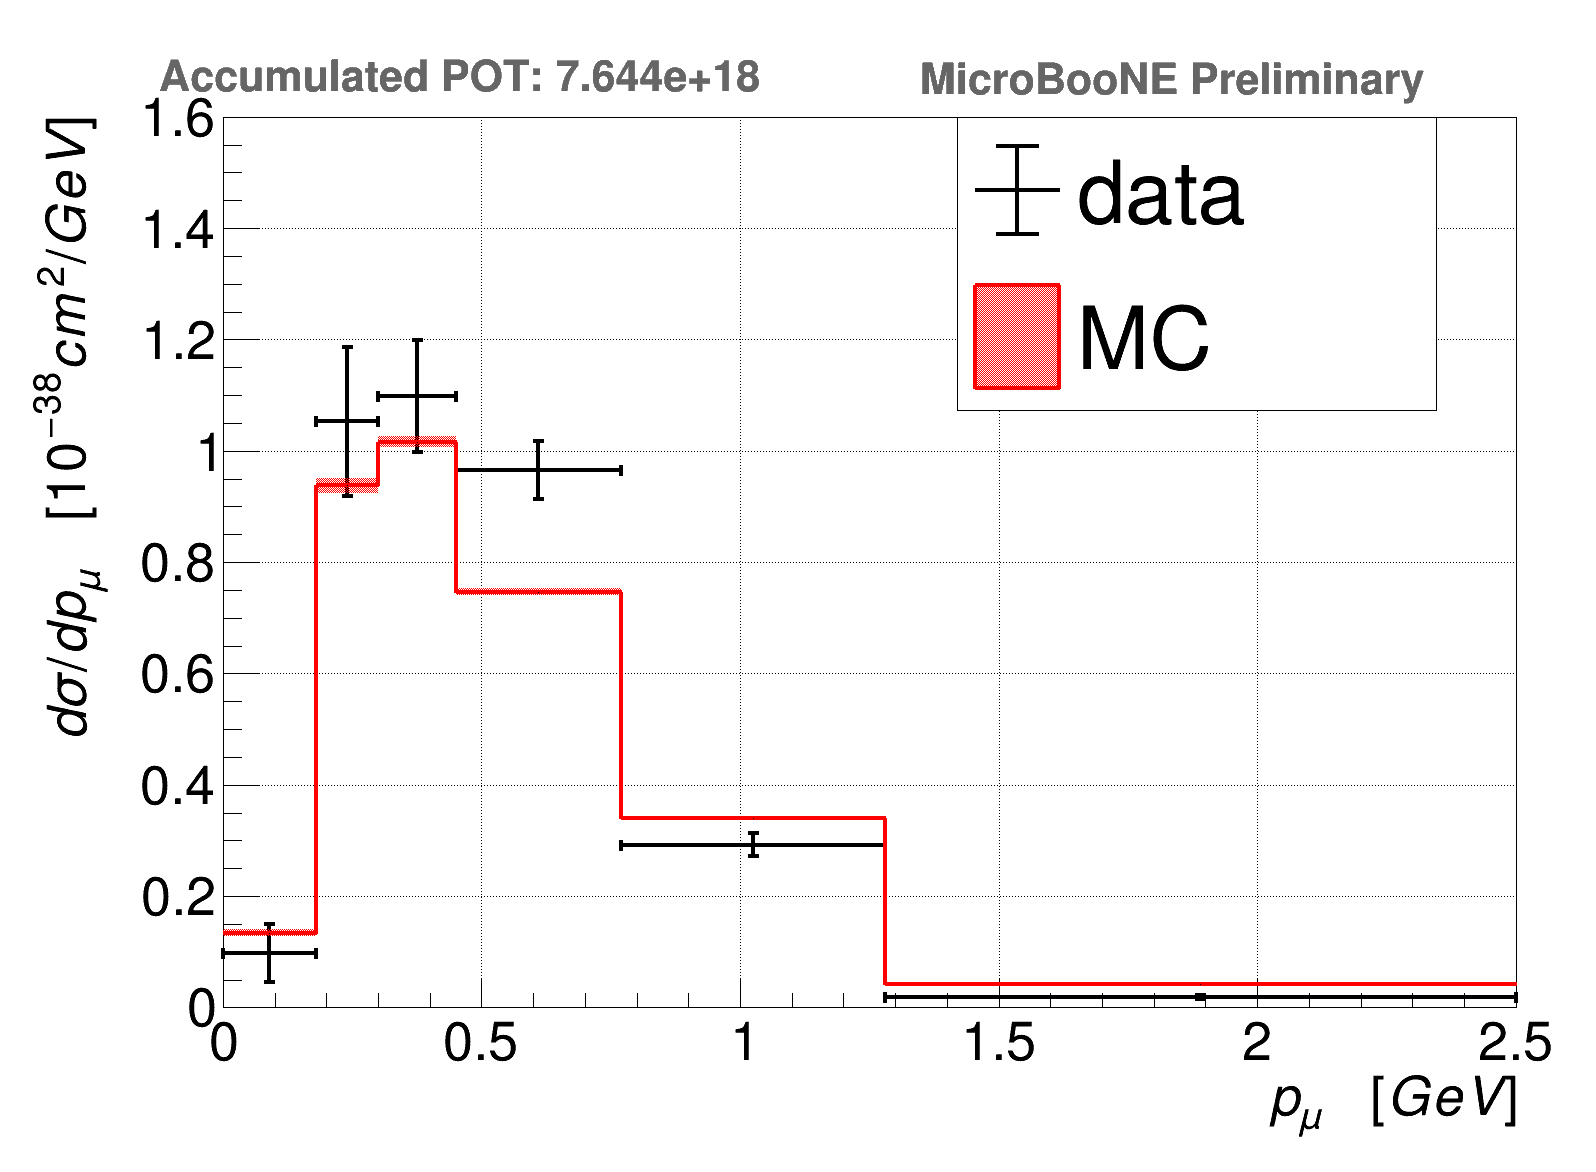

In [45]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("d\sigma / dp_{\mu} \t [10^{-38} cm^{2}/GeV]")
h_data.SetXTitle("p_{\mu} \t [GeV]")
h_data.SetLineWidth(3)
h_data.SetMaximum(1.6)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
#h_true.Draw('hist same')
#h_true_smeare.Draw('hist same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_corr.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_corr.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_corr.pdf")

h_data.Write("h_xsec_data")
h_overlay_sig.Write("h_xsec_MC")

423

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_xsec_corr_ratio.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_xsec_corr_ratio.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_xsec_corr_ratio.pdf has been created


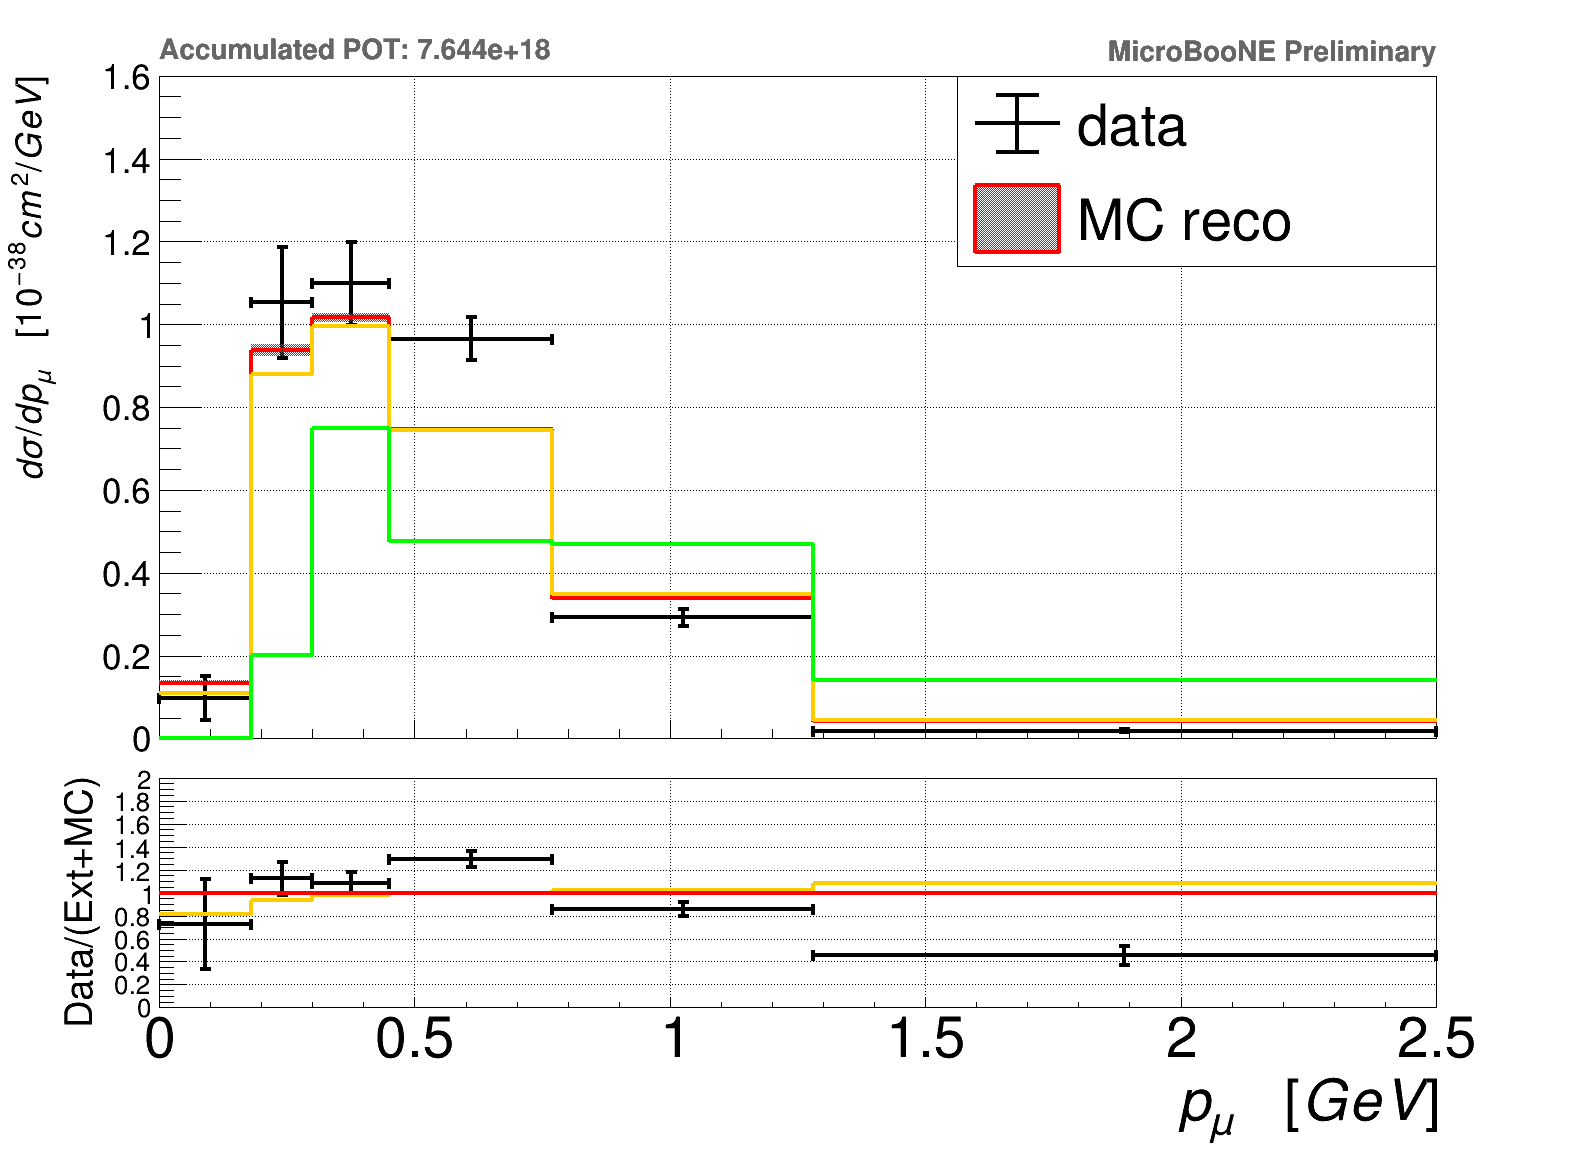

In [46]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC reco',"f");
#legend.AddEntry(h_true,'MC true',"f");
#legend.AddEntry(h_true_smeare,'MC true smeared',"f");

h_data.SetYTitle("d\sigma / dp_{\mu} \t [10^{-38} cm^{2}/GeV]")
h_data.SetXTitle("p_{\mu} \t [GeV]")
h_data.SetLineWidth(3)
h_data.SetMaximum(1.6)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_data.GetXaxis().SetLabelOffset(999);
h_data.GetXaxis().SetTitleOffset(999);
h_data.GetXaxis().SetLabelSize(0);
h_data.GetXaxis().SetTitleSize(0);

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
h_true.Draw('hist same')
h_true_smeare.Draw('hist same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()

c1.cd()
h_data.GetXaxis().SetLabelOffset(0);
h_data.GetXaxis().SetTitleOffset(0);

pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()

h_overlay_sig_ratio = h_overlay_sig.Clone()
h_overlay_sig_ratio.Divide(h_overlay_sig)
h_overlay_true_ratio = h_true.Clone()
h_overlay_true_ratio.Divide(h_overlay_sig)
h_overlay_data_ratio = h_data.Clone()
h_overlay_data_ratio.Divide(h_overlay_sig)
h_overlay_true_smeare_ratio = h_true_smeare.Clone()
h_overlay_true_smeare_ratio.Divide(h_overlay_sig)

h_overlay_data_ratio.SetMinimum(0.0)
h_overlay_data_ratio.SetMaximum(2.0)
h_overlay_sig_ratio.SetFillColor(0)
h_overlay_data_ratio.SetYTitle('Data/(Ext+MC)')
h_overlay_data_ratio.GetYaxis().SetTitleSize(0.1)
h_overlay_data_ratio.GetYaxis().SetTitleOffset(0.3)
h_overlay_data_ratio.GetYaxis().SetLabelSize(0.07)
h_overlay_data_ratio.GetXaxis().SetTitleSize(0.15)
h_overlay_data_ratio.GetXaxis().SetLabelSize(0.15)
h_overlay_data_ratio.GetXaxis().SetTitleOffset(1)

h_overlay_data_ratio.Draw('E1')
h_overlay_true_ratio.Draw('hist same')
h_overlay_sig_ratio.Draw('same hist')
#h_overlay_true_smeare_ratio.Draw('same hist')
#h_overlay_data_ratio.Draw('E1 same')


c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_corr_ratio.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_corr_ratio.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_corr_ratio.pdf")

h_data.Write("h_xsec_data")
h_overlay_sig.Write("h_xsec_MC")

503

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_xsec_corr_ratio_fake.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_xsec_corr_ratio_fake.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_xsec_corr_ratio_fake.pdf has been created


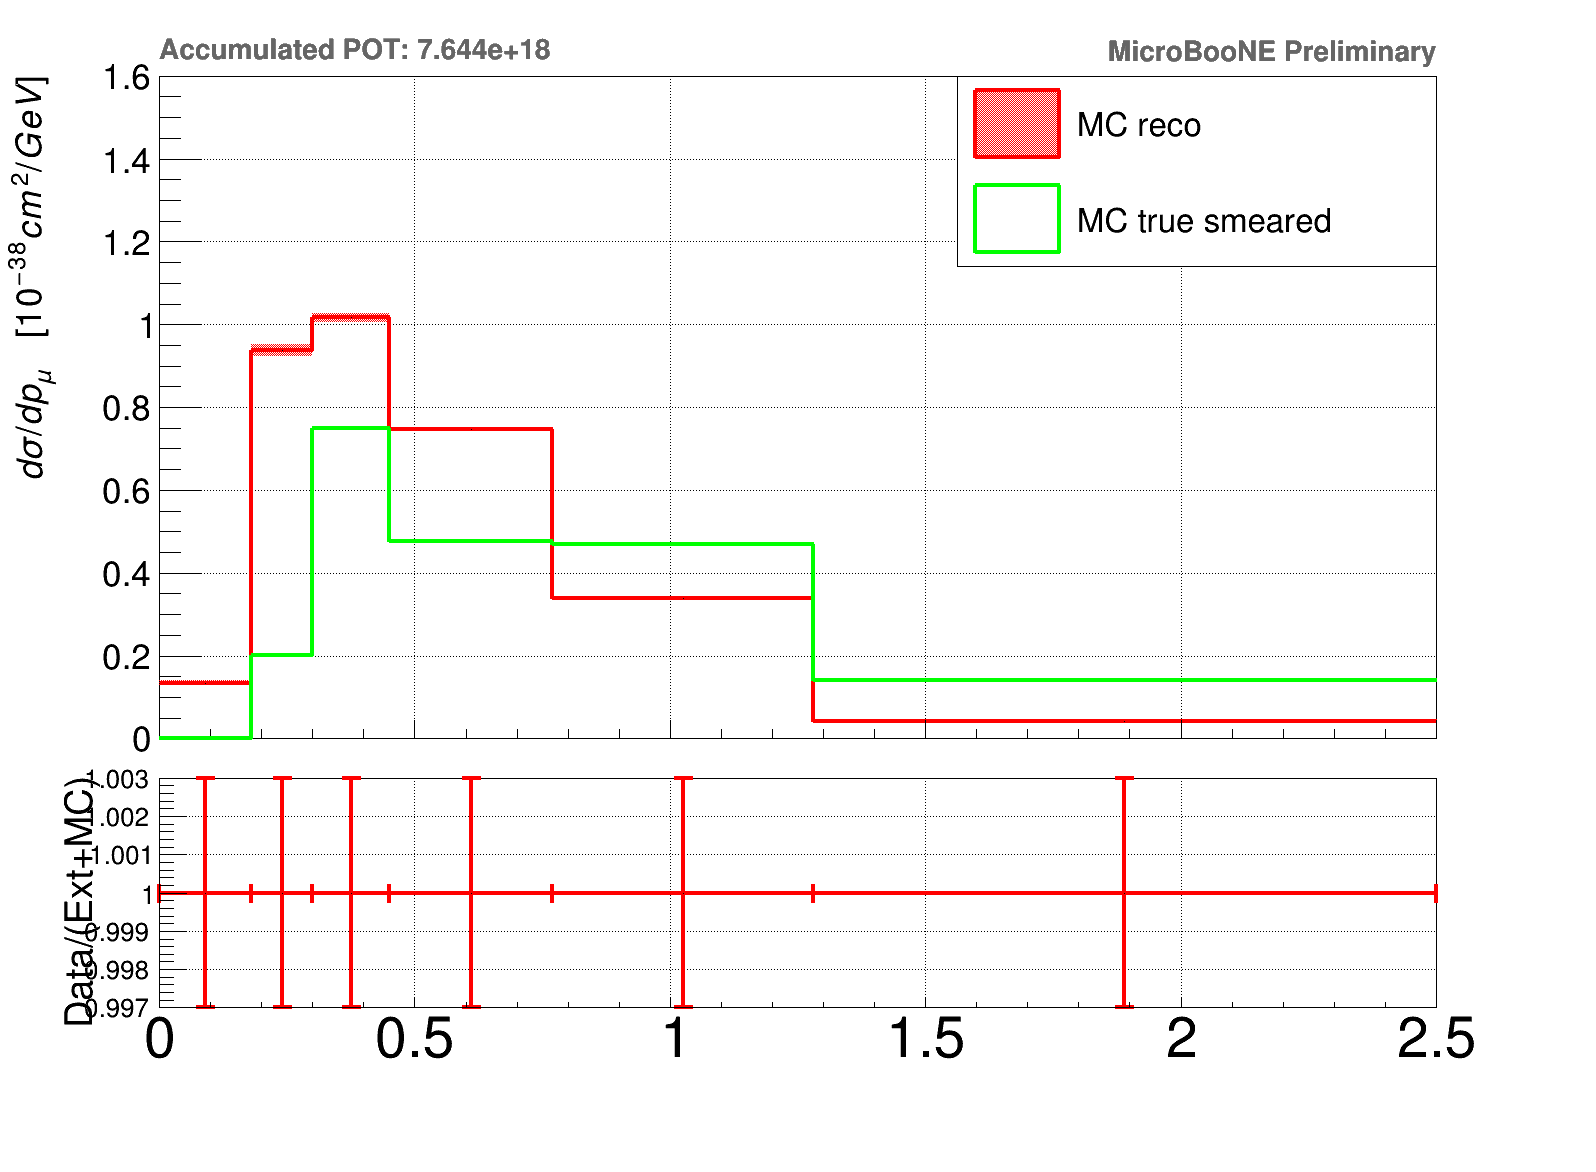

In [47]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

h_overlay_sig.SetLineColor(2)
#legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC reco',"f");
#legend.AddEntry(h_true,'MC true',"f");
legend.AddEntry(h_true_smeare,'MC true smeared',"f");

h_overlay_sig.SetYTitle("d\sigma / dp_{\mu} \t [10^{-38} cm^{2}/GeV]")
h_overlay_sig.SetXTitle("p_{\mu} \t [GeV]")
h_overlay_sig.SetLineWidth(3)
h_overlay_sig.SetMaximum(1.6)

h_overlay_sig.GetYaxis().SetTitleSize(0.05)
h_overlay_sig.GetYaxis().SetTitleOffset(0.0)
h_overlay_sig.GetYaxis().SetLabelSize(0.05)
h_overlay_sig.GetXaxis().SetTitleSize(0.05)
h_overlay_sig.GetXaxis().SetLabelSize(0.05)
h_overlay_sig.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_overlay_sig.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_overlay_sig.GetXaxis().SetLabelOffset(999);
h_overlay_sig.GetXaxis().SetTitleOffset(999);
h_overlay_sig.GetXaxis().SetLabelSize(0);
h_overlay_sig.GetXaxis().SetTitleSize(0);

#h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
#h_true.Draw('hist same')
h_true_smeare.Draw('hist same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()

c1.cd()
h_overlay_sig.GetXaxis().SetLabelOffset(0);
h_overlay_sig.GetXaxis().SetTitleOffset(0);

pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()

h_overlay_sig_ratio = h_overlay_sig.Clone()
h_overlay_sig_ratio.Divide(h_overlay_sig)
h_overlay_true_ratio = h_true.Clone()
h_overlay_true_ratio.Divide(h_overlay_sig)
h_overlay_data_ratio = h_data.Clone()
h_overlay_data_ratio.Divide(h_overlay_sig)
h_overlay_true_smeare_ratio = h_true_smeare.Clone()
h_overlay_true_smeare_ratio.Divide(h_overlay_sig)

h_overlay_sig_ratio.SetMinimum(0.997)
h_overlay_sig_ratio.SetMaximum(1.003)
h_overlay_sig_ratio.SetFillColor(0)
h_overlay_sig_ratio.SetYTitle('Data/(Ext+MC)')
h_overlay_sig_ratio.GetYaxis().SetTitleSize(0.1)
h_overlay_sig_ratio.GetYaxis().SetTitleOffset(0.3)
h_overlay_sig_ratio.GetYaxis().SetLabelSize(0.07)
h_overlay_sig_ratio.GetXaxis().SetTitleSize(0.15)
h_overlay_sig_ratio.GetXaxis().SetLabelSize(0.15)
h_overlay_sig_ratio.GetXaxis().SetTitleOffset(1)

#h_overlay_data_ratio.Draw('E1')
#h_overlay_true_ratio.Draw('hist same')
h_overlay_sig_ratio.Draw('E1')
h_overlay_true_smeare_ratio.Draw('same E1')
#h_overlay_data_ratio.Draw('E1 same')


c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_corr_ratio_fake.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_corr_ratio_fake.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_corr_ratio_fake.pdf")

h_data.Write("h_xsec_data")
h_overlay_sig.Write("h_xsec_MC")

In [48]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [49]:
# close the root file with all the histos
RootFile.Close()

# NOW in cos(theta)

In [50]:
RootFile = ROOT.TFile(output_filedir+"xsec_theta_wighted.root","RECREATE");

mom_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]
binnum = len(mom_bins) - 1
h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))


861

Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_eff_trueTheta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_eff_trueTheta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_eff_trueTheta.pdf has been created


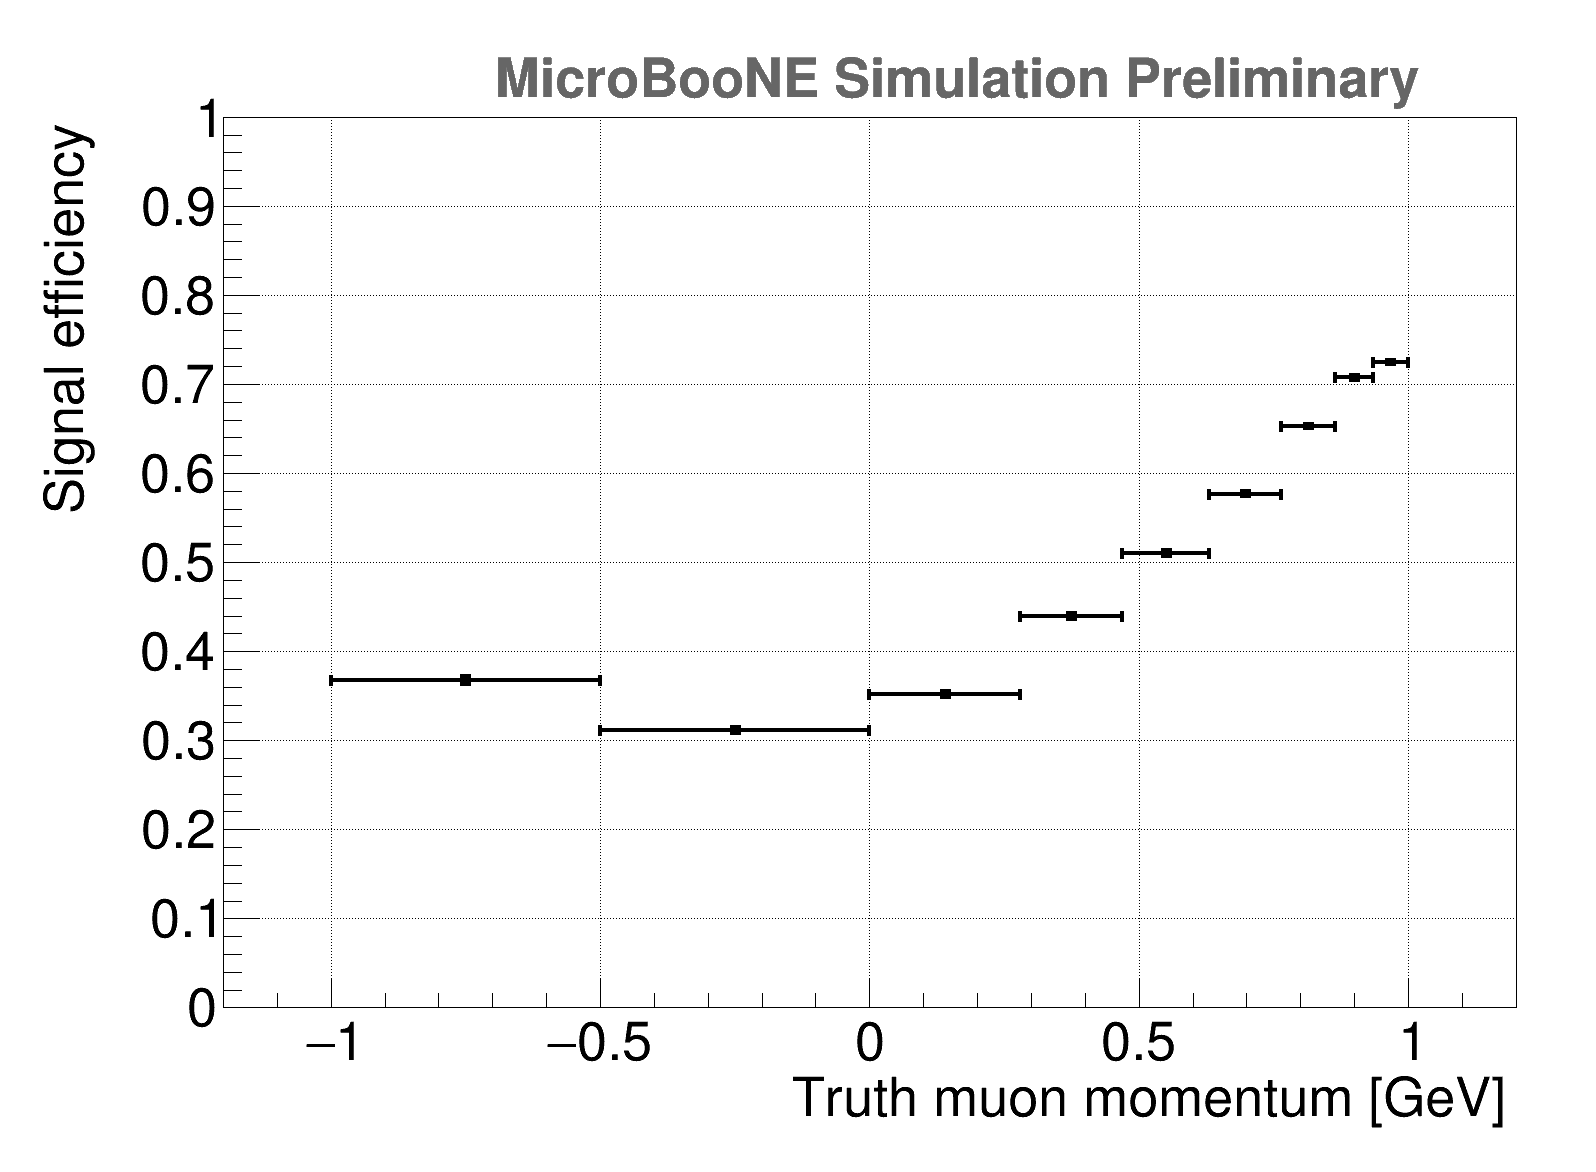

In [51]:
xstart = 0
xend = 2
xbin = 100
#weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum theta efficiency'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
#h_init_eff_energy = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy,zahler_cut)
#h_init_eff_energy_1 = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy_1,nenner_cut)
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("Truth muon momentum [GeV]")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.GetYaxis().SetTitleSize(0.05)
graph.GetYaxis().SetTitleOffset(0.0)
graph.GetYaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleSize(0.05)
graph.GetXaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleOffset(1)
graph.SetLineColor(ROOT.kBlack)
graph.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
graph.Draw("AP")
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_trueTheta.png")
c1.SaveAs(globale.outputdir_root + "h_eff_trueTheta.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_trueTheta.pdf")

eff.Write("h_eff_true")

99749

Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h2_true_costheta.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h2_true_costheta.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h2_true_costheta.pdf has been created


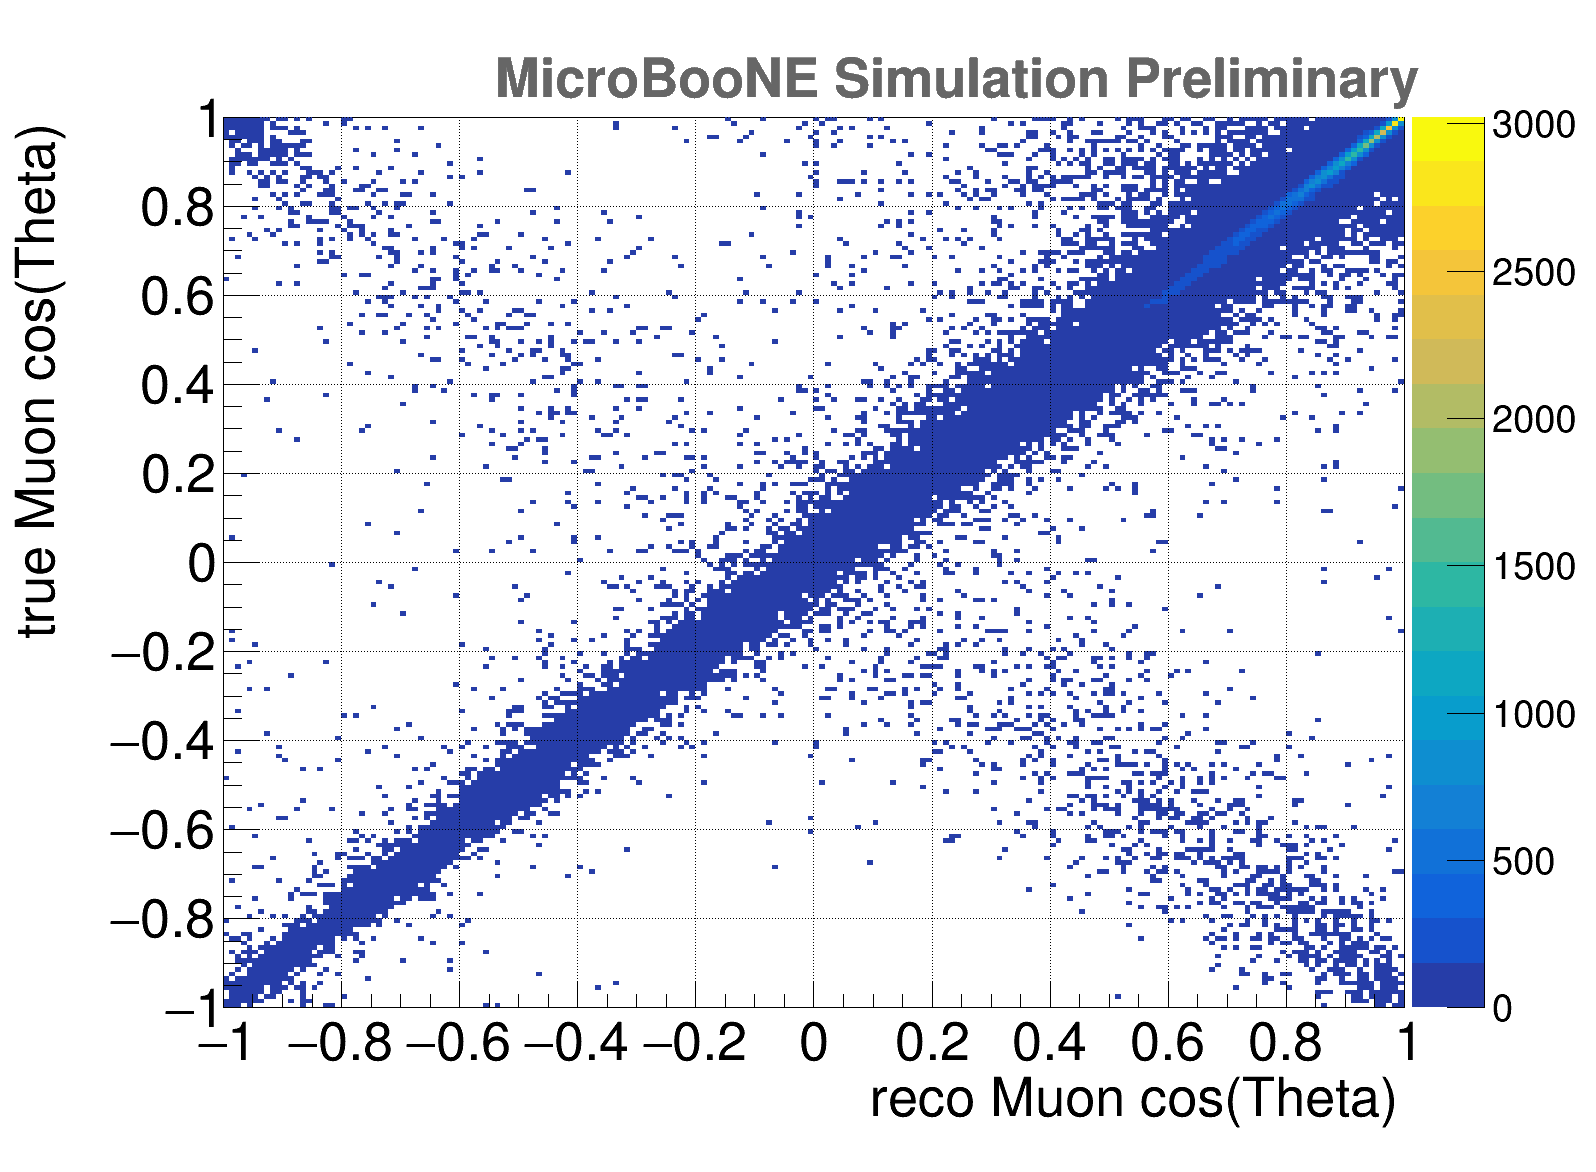

In [52]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,-1,1,200,-1,1)
globale.overlay_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&& numu_signal)','')
h_migration.SetXTitle("reco Muon cos(Theta)")
h_migration.SetYTitle("true Muon cos(Theta)")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
h_migration.Draw("colz")
prelim = draw_sim()
prelim.Draw()
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_costheta.root")
c1.SaveAs(globale.outputdir_png + "h2_true_costheta.png")
c1.SaveAs(globale.outputdir_pdf + "h2_true_costheta.pdf")

h_migration.Write("h2_true_theta_fine")

1665

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h2_true_Theta_bin.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h2_true_Theta_bin.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h2_true_Theta_bin.pdf has been created


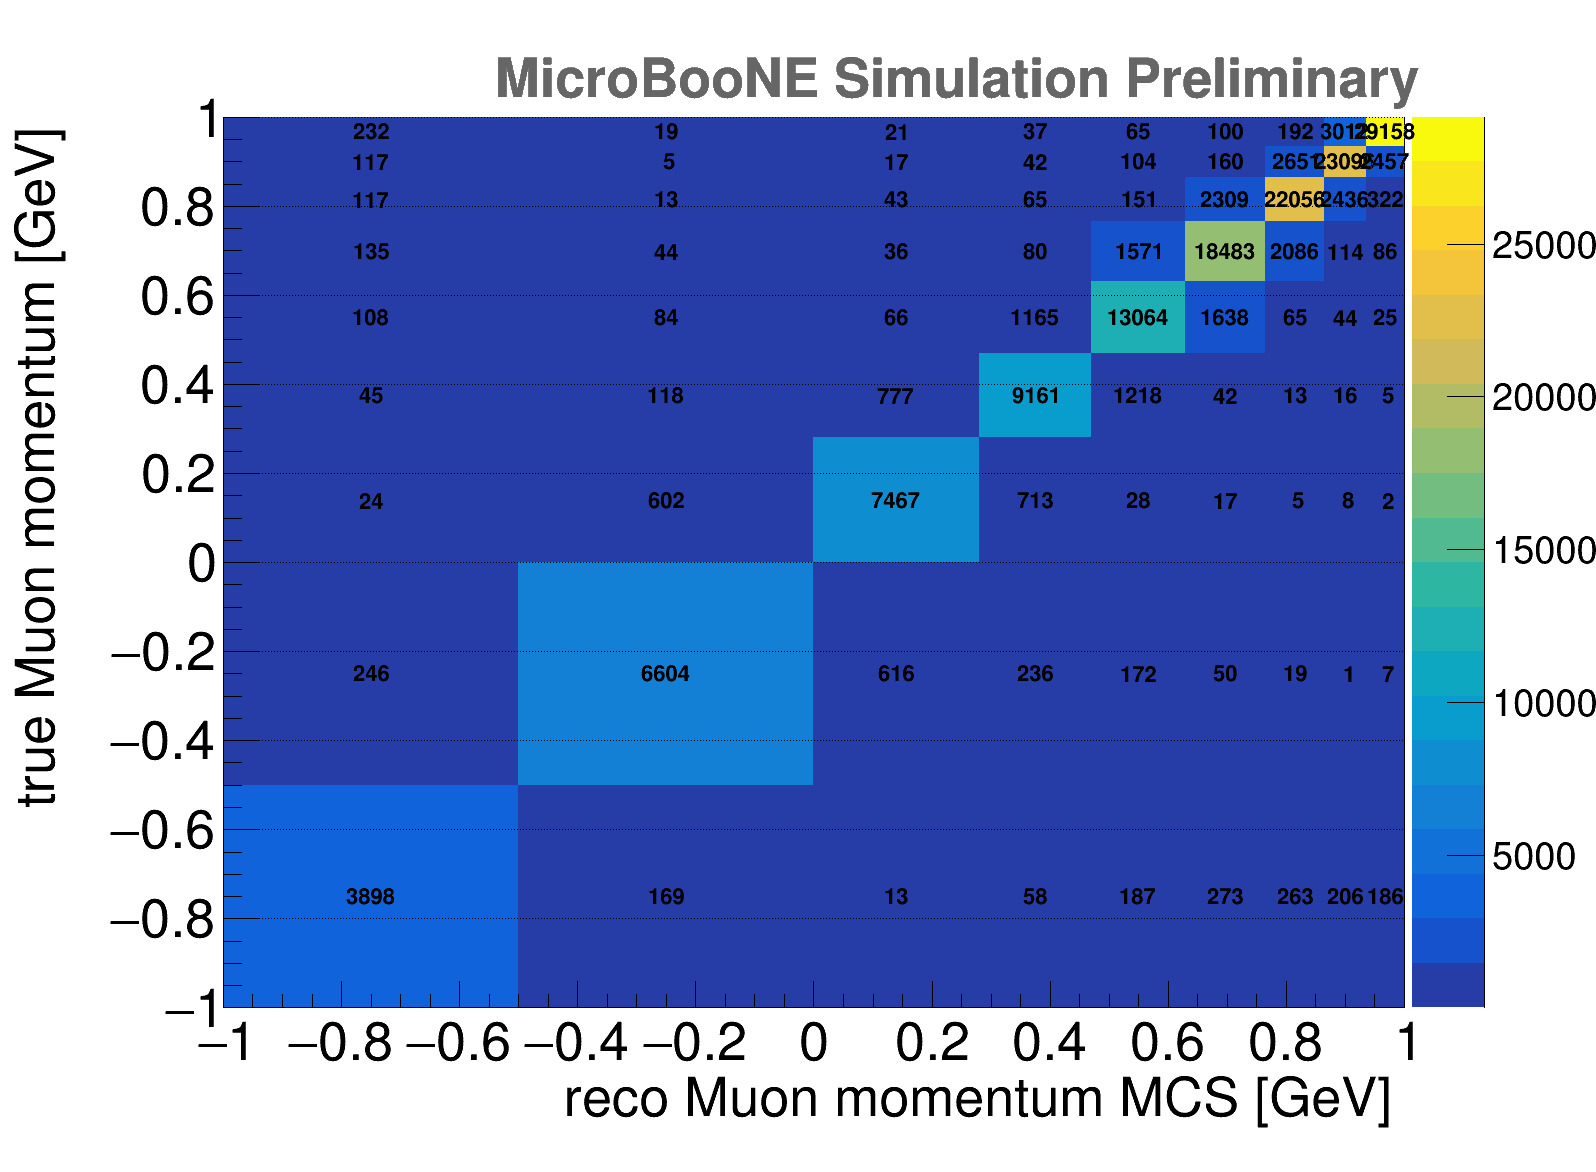

In [53]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
globale.overlay_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&& numu_signal)','')
#globale.overlay_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*( numu_true)','')
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat("2.0f");
h_migration.Draw("colz")
h_migration.Draw("same text")
c1.SetGrid(0)
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_Theta_bin.root")
c1.SaveAs(globale.outputdir_png + "h2_true_Theta_bin.png")
c1.SaveAs(globale.outputdir_pdf + "h2_true_Theta_bin.pdf")

h_migration.Write("h2_true_theta_bin")

[[7.41863429e-01 3.09015734e-02 2.72031625e-03 3.92735741e-03
  6.63823392e-03 5.95873340e-03 4.26859117e-03 4.07332553e-03
  7.06890047e-03]
 [3.21127684e-02 8.30554292e-01 6.79079437e-02 1.03986287e-02
  5.18683039e-03 1.92571746e-03 4.80143180e-04 1.73090943e-04
  5.81210257e-04]
 [2.56224768e-03 7.74262420e-02 8.42245372e-01 6.81627060e-02
  4.08266237e-03 1.58664040e-03 1.57274878e-03 5.83841400e-04
  6.46535645e-04]
 [1.10982511e-02 2.96373492e-02 8.03813109e-02 8.04004876e-01
  7.16294903e-02 3.52022069e-03 2.35219813e-03 1.45997023e-03
  1.12005982e-03]
 [3.55728926e-02 2.16891554e-02 3.11071676e-03 1.06876945e-01
  8.03519100e-01 6.93996953e-02 5.49705874e-03 3.62144249e-03
  1.98614623e-03]
 [5.20576671e-02 6.32655005e-03 1.94334613e-03 3.64542183e-03
  1.00723316e-01 8.16608974e-01 8.39351810e-02 5.57684999e-03
  3.05058220e-03]
 [5.00871814e-02 2.41163468e-03 5.17405924e-04 1.13318811e-03
  4.00005248e-03 9.21462726e-02 8.01641345e-01 9.25422748e-02
  5.84182941e-03]
 [3.91

857

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_mitigation_matrix_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_mitigation_matrix_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_mitigation_matrix_theta.pdf has been created


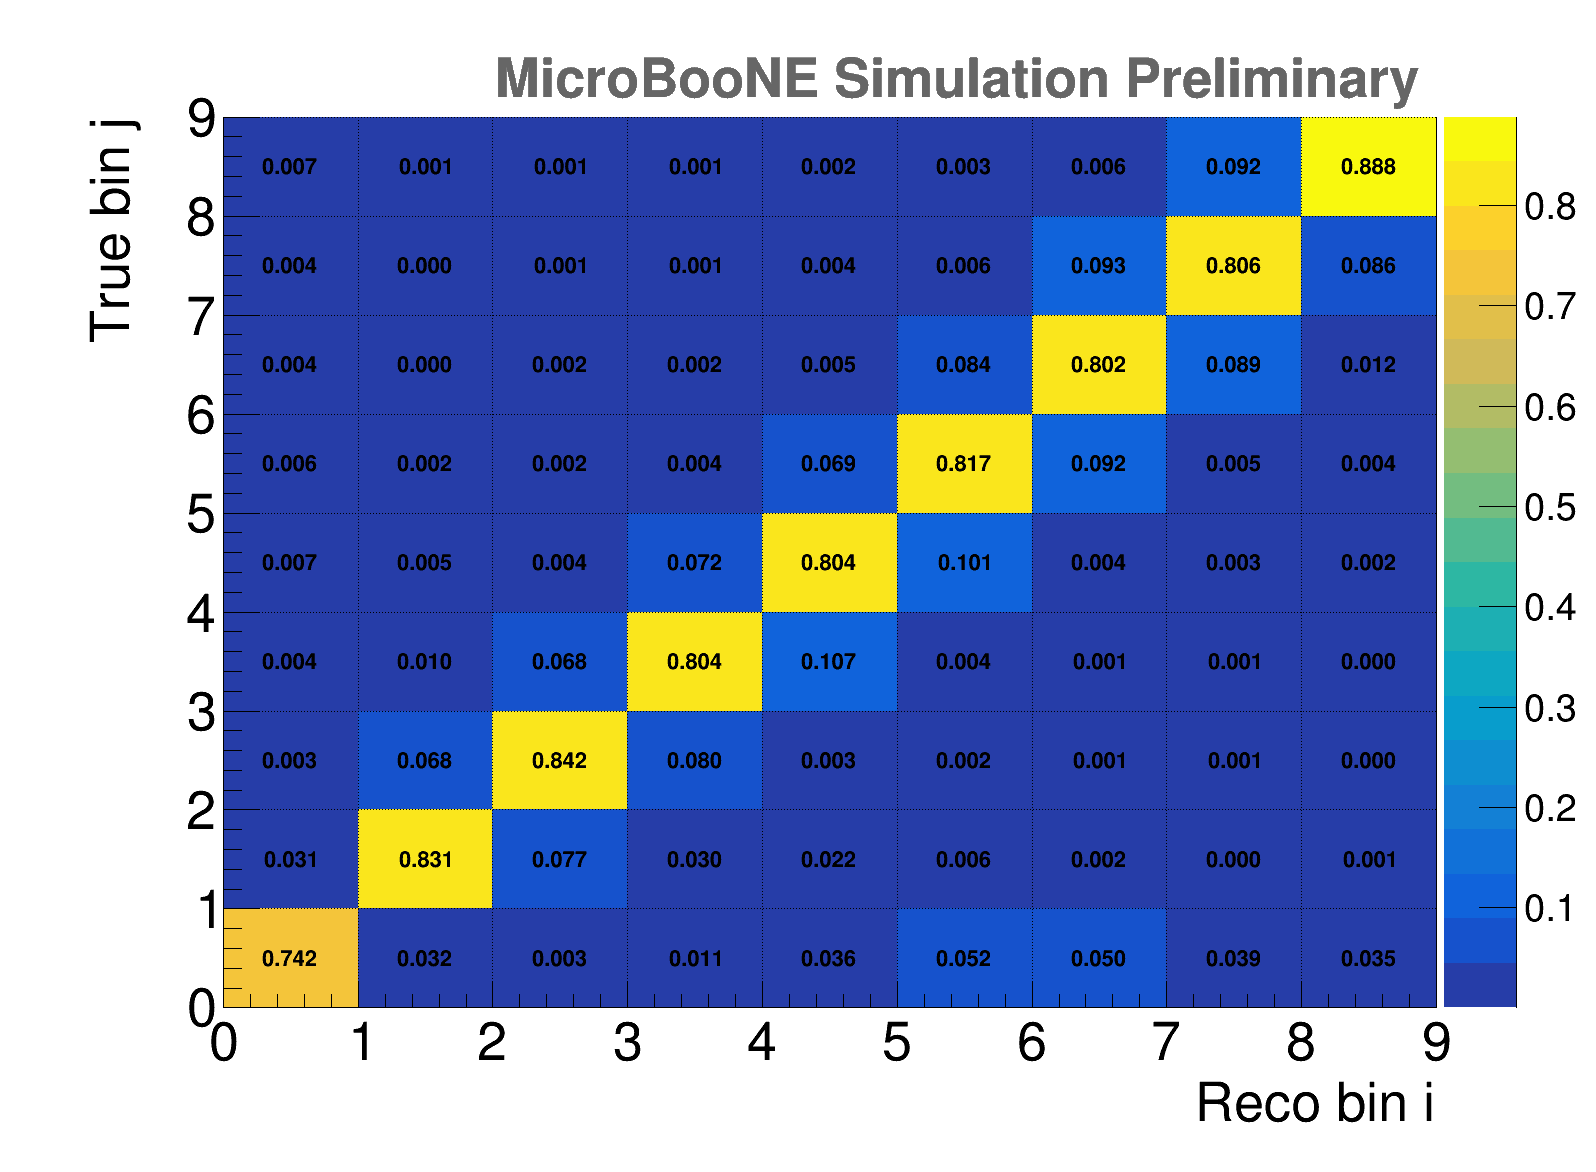

In [54]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ROOT.gStyle.SetPaintTextFormat("2.3f");
mitigation_matrix = np.zeros((9,9))
for j in range(1,binnum+1):
    for i in range(1,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j-1]+=h_migration.GetBinContent(i,j)
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',9,0,9,9,0,9)
for j in range(1,binnum+1):
    for i in range(1,binnum+1):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        mitigation_matrix[i-1,j-1]= h_migration.GetBinContent(i,j)/reco_entries[j-1]
        h_mitigation_matrix.SetBinContent(i,j,mitigation_matrix[i-1,j-1])
        #print i-1,j-1,mitigation_matrix[i-1,j-1]
        #true_entries[j]+=h_migration.GetBinContent(i,j)
print mitigation_matrix
np.save(output_filedir+'migration_matrix_theta',mitigation_matrix)

h_mitigation_matrix.SetXTitle("Reco bin i")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')
h_mitigation_matrix.GetYaxis().SetTitleSize(0.05)
h_mitigation_matrix.GetYaxis().SetTitleOffset(0.0)
h_mitigation_matrix.GetYaxis().SetLabelSize(0.05)
h_mitigation_matrix.GetXaxis().SetTitleSize(0.05)
h_mitigation_matrix.GetXaxis().SetLabelSize(0.05)
h_mitigation_matrix.GetXaxis().SetTitleOffset(1)
h_mitigation_matrix.SetLineColor(ROOT.kBlack)
h_mitigation_matrix.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')
prelim = draw_sim()
prelim.Draw()
c1.SetGrid(1)
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_mitigation_matrix_theta.png")
c1.SaveAs(globale.outputdir_root + "h_mitigation_matrix_theta.root")
c1.SaveAs(globale.outputdir_pdf + "h_mitigation_matrix_theta.pdf")

h_mitigation_matrix.Write("h_mitigation_matrix_theta")

290091.665039
290091.669922
161355.838867
161357.839355
0.556223629677
0.556230516371


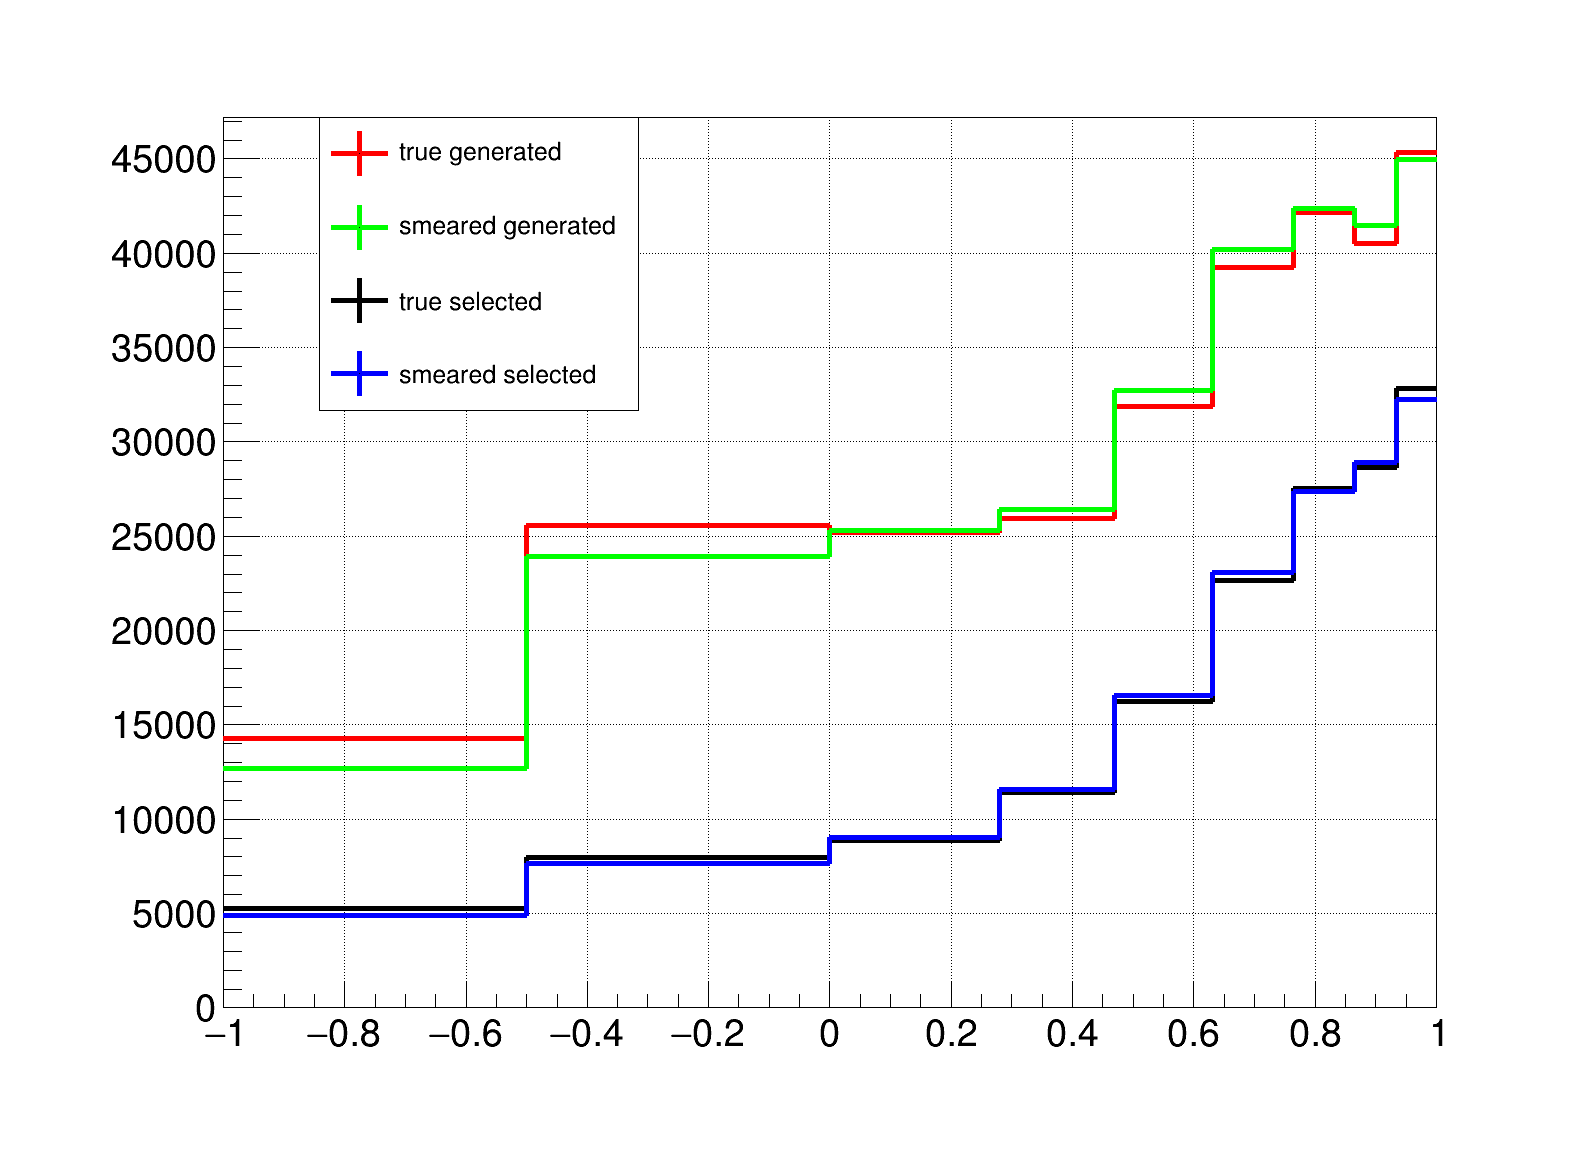

In [55]:
h_init_eff_energy_1.SetLineWidth(5)
h_init_eff_energy_1.SetLineColor(ROOT.kRed)
h_init_eff_energy_1.SetMinimum(0)
h_init_eff_energy.SetLineWidth(5)
h_init_eff_energy.SetLineColor(ROOT.kBlack)


gen_smeared = np.zeros((9))
sel_smeared = np.zeros((9))
for i in range(1,binnum+1):
    gen_smeared[i-1] = h_init_eff_energy_1.GetBinContent(i)
    sel_smeared[i-1] = h_init_eff_energy.GetBinContent(i)
gen_smeared = mitigation_matrix.dot(gen_smeared)
sel_smeared = mitigation_matrix.dot(sel_smeared)

h_init_eff_energy_1_sm = h_init_eff_energy_1.Clone()
h_init_eff_energy_sm = h_init_eff_energy_1.Clone()

for i in range(1,binnum+1):
    h_init_eff_energy_1_sm.SetBinContent(i,gen_smeared[i-1])
    h_init_eff_energy_sm.SetBinContent(i,sel_smeared[i-1])
    
h_init_eff_energy_1_sm.SetLineWidth(5)
h_init_eff_energy_1_sm.SetLineColor(ROOT.kGreen)
h_init_eff_energy_1_sm.SetMinimum(0)
h_init_eff_energy_sm.SetLineWidth(5)
h_init_eff_energy_sm.SetLineColor(ROOT.kBlue)

legend = ROOT.TLegend(0.2,0.65,0.4,0.9)
legend.AddEntry(h_init_eff_energy_1,'true generated',"lep");
legend.AddEntry(h_init_eff_energy_1_sm,'smeared generated',"lep");
legend.AddEntry(h_init_eff_energy,'true selected',"lep");
legend.AddEntry(h_init_eff_energy_sm,'smeared selected',"lep");

h_init_eff_energy_1_sm.Draw('hist')

h_init_eff_energy_1.Draw('same hist')
h_init_eff_energy.Draw('same hist')
h_init_eff_energy_1_sm.Draw('same hist')
h_init_eff_energy_sm.Draw('same hist')
legend.Draw()

print h_init_eff_energy_1.Integral(0,binnum+2)
print h_init_eff_energy_1_sm.Integral(0,binnum+2)

print h_init_eff_energy.Integral(0,binnum+2)
print h_init_eff_energy_sm.Integral(0,binnum+2)

print h_init_eff_energy.Integral(0,binnum+2)/h_init_eff_energy_1.Integral(0,binnum+2)
print h_init_eff_energy_sm.Integral(0,binnum+2)/h_init_eff_energy_1_sm.Integral(0,binnum+2)

c1.Draw()

In [56]:
# Nselected and N generated
title = 'MCS momentum efficiency'
#weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
h_init_eff_energy.Write("h_eff_true_theta_z")
h_init_eff_energy_1.Write("h_eff_true_theta_n")

538

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).


In [57]:
# e tilde
N_sel = np.zeros((9))
N_gen = np.zeros((9))
for i in range(1,binnum+1):
    N_sel[i-1] = h_init_eff_energy.GetBinContent(i)
    N_gen[i-1] = h_init_eff_energy_1.GetBinContent(i)
    print N_sel[i-1],N_gen[i-1],N_sel[i-1]/N_gen[i-1]
eff_tilde = np.zeros((6))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
print eff_tilde
np.save(outputdir+'eff_tilde_theta_xsec_CV',eff_tilde)

5253.7763671875 14296.5224609375 0.3674863157486329
7950.861328125 25545.73828125 0.31124022490909
8865.330078125 25216.6640625 0.3515663315398145
11393.587890625 25923.783203125 0.4395032855101007
16258.15625 31871.7265625 0.5101121904430872
22634.41015625 39254.66796875 0.5766042951699116
27513.52734375 42143.4296875 0.6528544911452872
28646.712890625 40502.609375 0.7072806748176332
32836.4765625 45331.5234375 0.72436296141189
[0.3882081  0.31971372 0.35749417 0.43741401 0.50618811 0.57371272
 0.64561542 0.69799182 0.71718093]


In [58]:
h_eff = h_init_eff_energy.Clone()
h_eff.Divide(h_init_eff_energy_1)

True

517

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_eff_tilde_xsecTheta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_eff_tilde_xsecTheta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_eff_tilde_xsecTheta.pdf has been created


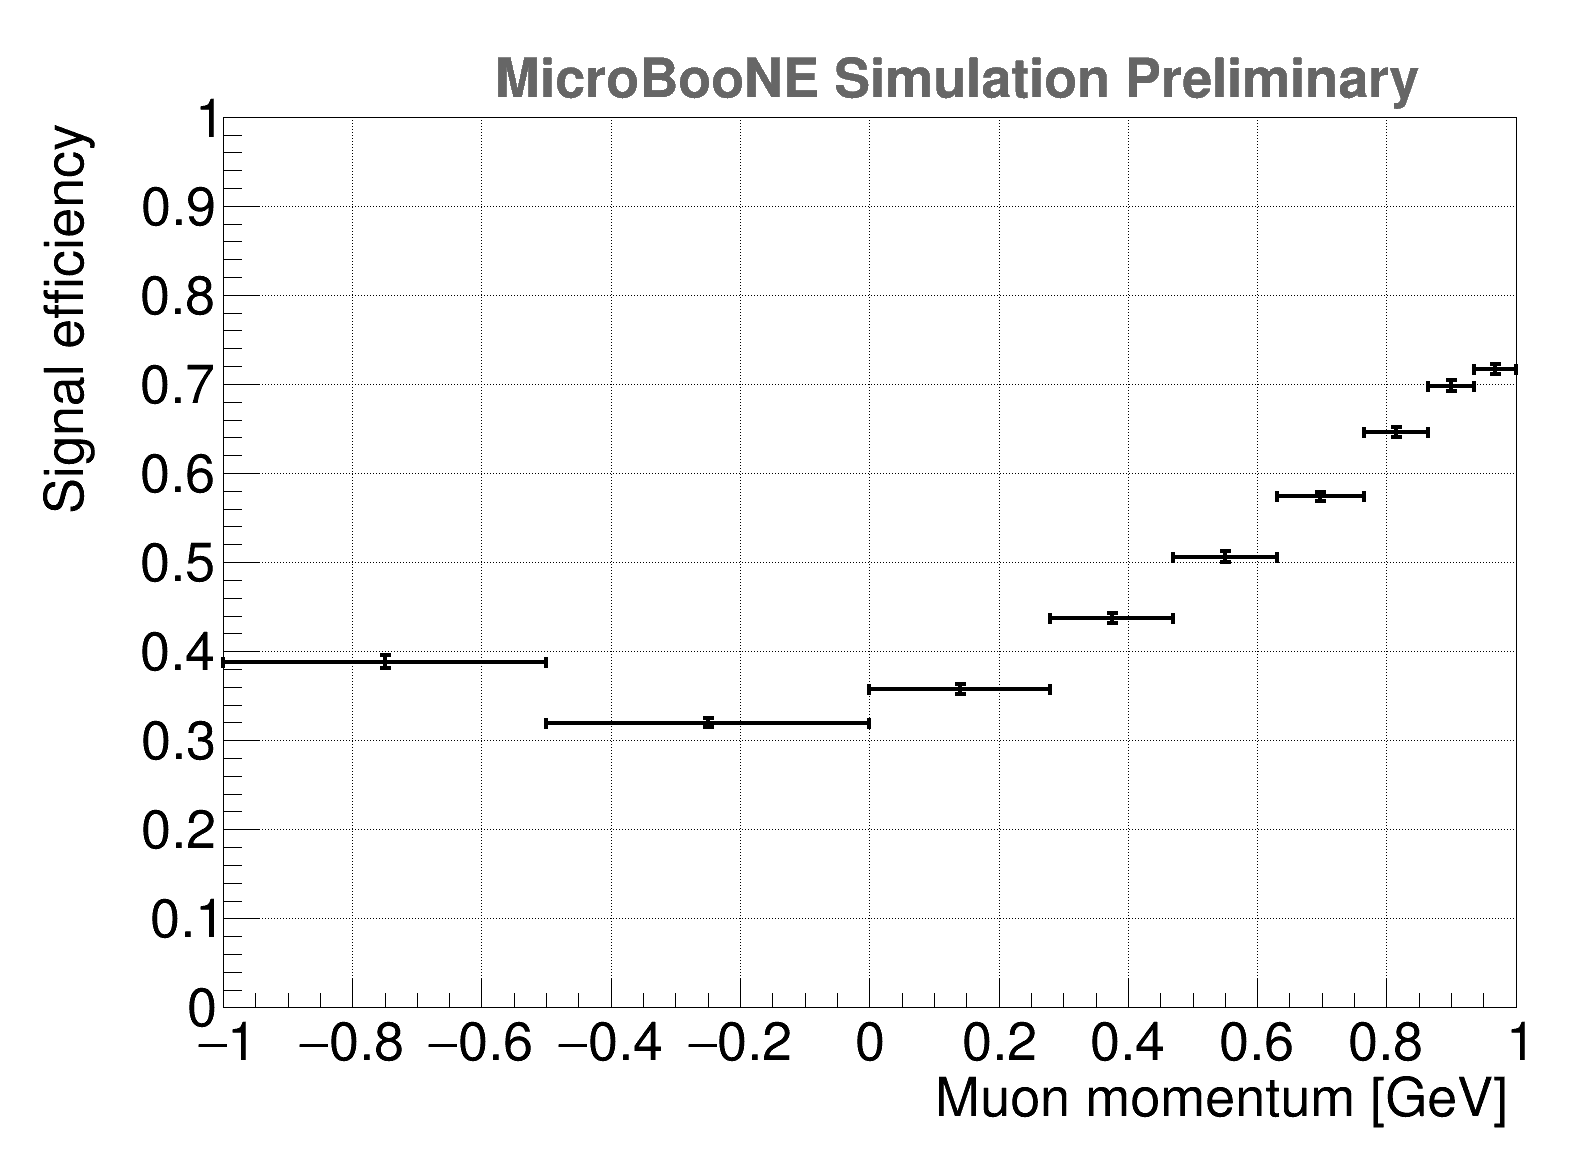

In [59]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+1):
    h_eff_tilde.SetBinContent(i,eff_tilde[i-1])
    h_eff_tilde.SetBinError(i,h_eff.GetBinError(i))
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)

h_eff_tilde.SetXTitle("Muon momentum [GeV]")
h_eff_tilde.SetYTitle("Signal efficiency")
h_eff_tilde.GetYaxis().SetTitleSize(0.05)
h_eff_tilde.GetYaxis().SetTitleOffset(0.0)
h_eff_tilde.GetYaxis().SetLabelSize(0.05)
h_eff_tilde.GetXaxis().SetTitleSize(0.05)
h_eff_tilde.GetXaxis().SetLabelSize(0.05)
h_eff_tilde.GetXaxis().SetTitleOffset(1)
h_eff_tilde.SetLineColor(ROOT.kBlack)
h_eff_tilde.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_eff_tilde.Draw('E1')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_tilde_xsecTheta.png")
c1.SaveAs(globale.outputdir_root + "h_eff_tilde_xsecTheta.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_tilde_xsecTheta.pdf")

h_eff_tilde.Write("h_eff_tilde")

In [60]:
#weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'cos(TrackTheta)'
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
#h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
h_signal = ROOT.TH1F("h_signal",'h_signal',binnum,array('f',mom_bins))

#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

globale.data_out.Draw(variable+'>>h_data',cut,'')
globale.ext_out.Draw(variable+'>>h_ext',cut,'')
#globale.dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+')','')
globale.overlay_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !numu_signal)','')
globale.overlay_out.Draw(variable+'>>h_signal',weight_name+'*('+cut+'&& numu_signal)','')


136429L

In [61]:
h_data.Sumw2()
h_ext.Sumw2()
#h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(globale.scale[globale.data])
h_ext.Scale(globale.scale[globale.ext])
#h_dirt.Scale(globale.scale[globale.dirt])
h_overlay.Scale(globale.scale[globale.overlay])

h_data.Write("h_data")
h_ext.Write("h_ext")
#h_dirt.Write("h_dirt")
h_overlay.Write("h_overlay")

480

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [62]:
print h_overlay.GetSumOfWeights()
h_data.Add(h_ext,-1)
#h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

199.811145782
1006.00981903


In [63]:
h_overlay_sig = ROOT.TH1F("h_overlay_sig",'h_overlay',binnum,array('f',mom_bins))
globale.overlay_out.Draw(variable+'>>h_overlay_sig',weight_name+'*('+cut+'&& numu_signal)','')
h_overlay_sig.Scale(globale.scale[globale.overlay])

498

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_data_theta_bkgsubtracted.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_data_theta_bkgsubtracted.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_data_theta_bkgsubtracted.pdf has been created


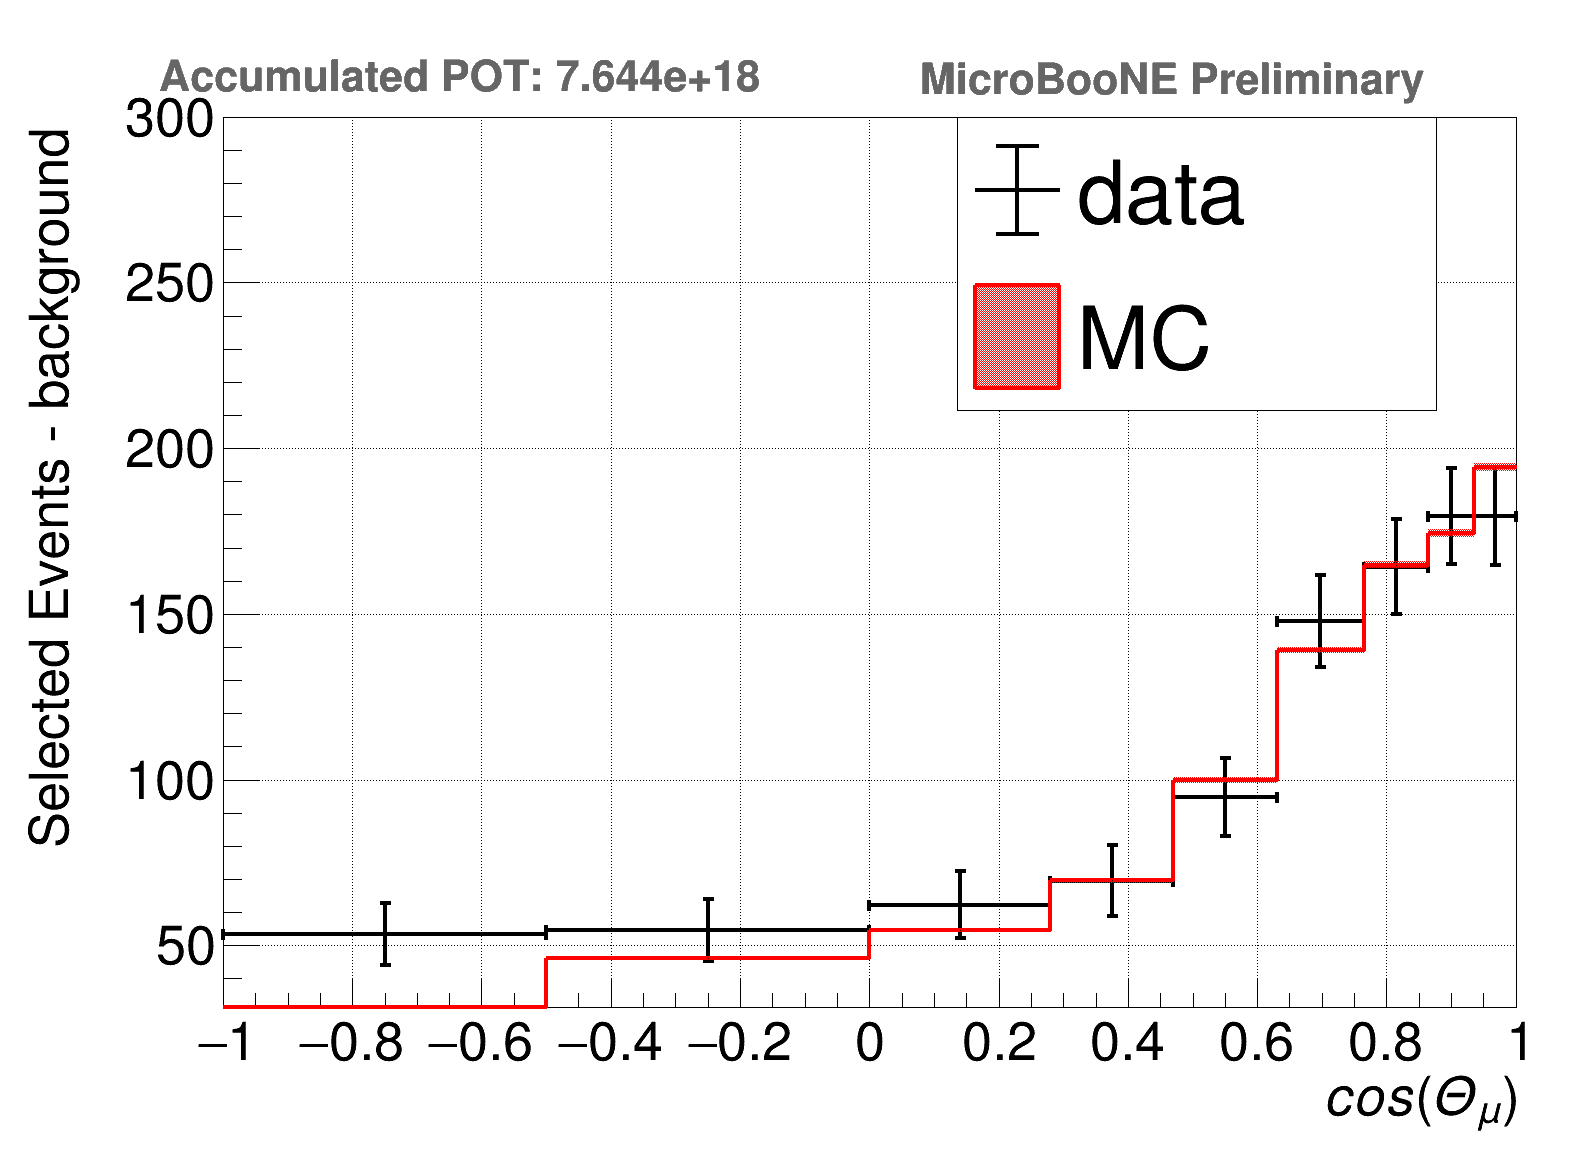

In [64]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("Selected Events - background")
h_data.SetXTitle("cos(\Theta_{\mu})")
h_data.SetLineWidth(3)
h_data.SetMaximum(300)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_data_theta_bkgsubtracted.png")
c1.SaveAs(outputdir_root + "h_data_theta_bkgsubtracted.root")
c1.SaveAs(outputdir_pdf + "h_data_theta_bkgsubtracted.pdf")

h_data.Write("h_data_theta_bkgsubtracted")
h_overlay_sig.Write("h_MC_theta_bkgsubtracted")

In [65]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))
    h_data.SetBinError(i,h_data.GetBinError(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinError(i,h_overlay_sig.GetBinError(i)/h_overlay_sig.GetBinWidth(i))
    print h_data.GetBinContent(i)/h_data.GetBinWidth(i)

213.901885986
218.87097168
794.477077916
1925.59110147
3700.9240024
8114.44827288
16422.2580475
36647.7471877
42506.4468716


496

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_data_theta_bkgsubtracted_binwidth.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_data_theta_bkgsubtracted_binwidth.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_data_theta_bkgsubtracted_binwidth.pdf has been created


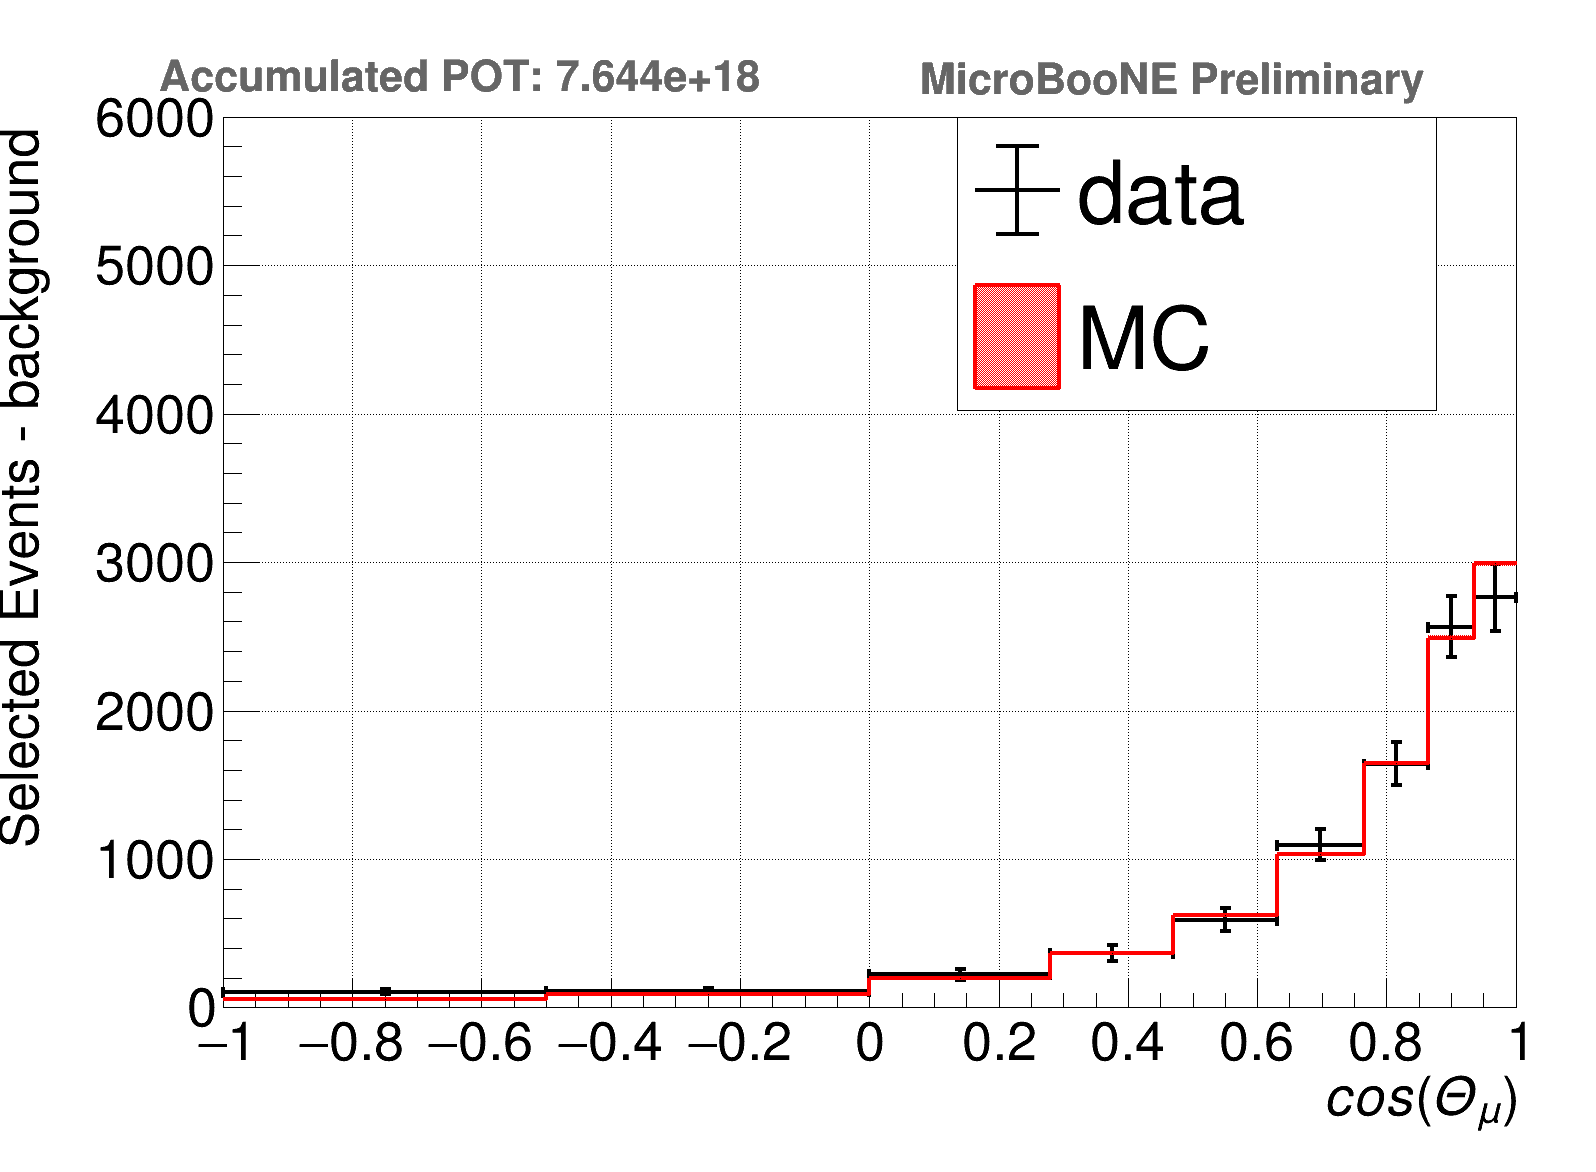

In [66]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("Selected Events - background")
h_data.SetXTitle("cos(\Theta_{\mu})")
h_data.SetLineWidth(3)
h_data.SetMaximum(6000)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_data_theta_bkgsubtracted_binwidth.png")
c1.SaveAs(outputdir_root + "h_data_theta_bkgsubtracted_binwidth.root")
c1.SaveAs(outputdir_pdf + "h_data_theta_bkgsubtracted_binwidth.pdf")

h_data.Write("h_data_theta_bkgsubtracted_binwidth")
h_overlay_sig.Write("h_MC_theta_bkgsubtracted_binwidth")

In [67]:
 # cos(MCNu_leptonTheta):cos(TrackTheta)
h_true = ROOT.TH1F("h_true",'h_true',binnum,array('f',mom_bins))
globale.overlay_out.Draw('cos(MCNu_leptonTheta)'+'>>h_true',weight_name+'*(numu_true)','')

h_true_tot = ROOT.TH1F("h_true_tot",'h_true_tot',binnum,array('f',mom_bins))
globale.overlay_out.Draw('cos(MCNu_leptonTheta)'+'>>h_true_tot',weight_name+'*(numu_true)','')

h_eff_test = h_true.Clone()
h_eff_test.Divide(h_true_tot)

h_true.Scale(globale.scale[globale.overlay])
h_true.SetLineColor(ROOT.kOrange)
h_true.SetLineWidth(4)

#h_true.Divide(h_eff_test)

h_true_smeare = h_true.Clone()
true_bins = np.zeros((9))
for i in range(1,binnum+1):
    true_bins[i-1] = h_true.GetBinContent(i)
    
true_bins_smeared = np.zeros((binnum+1))

true_bins_smeared = mitigation_matrix.dot(true_bins)
#sel_smeared = mitigation_matrix.dot(sel_smeared)


for i in range(1,binnum+1):
    h_true_smeare.SetBinContent(i,true_bins_smeared[i-1])
    print true_bins_smeared[i-1]
    print 'Eff: ',h_eff_test.GetBinContent(i)
h_true_smeare.SetLineColor(ROOT.kGreen)
h_true_smeare.SetLineWidth(4)



76.41288572776675
Eff:  1.0
144.3828979560312
Eff:  1.0
152.69605728374228
Eff:  1.0
159.22968810087463
Eff:  1.0
197.19396605728096
Eff:  1.0
242.42004888000196
Eff:  1.0
255.34922812314593
Eff:  1.0
249.87006992503848
Eff:  1.0
271.03888505793424
Eff:  1.0


In [68]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux*1e-38))

h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux*1e-38))

h_true.Scale(1.0/(N_tot*beam_flux*1e-38))
h_true_smeare.Scale(1.0/(N_tot*beam_flux*1e-38))

In [69]:
for i in range(1,binnum+1):
    #h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    #h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))
    #h_data.SetBinError(i,h_data.GetBinError(i)/h_data.GetBinWidth(i))
    #h_overlay_sig.SetBinError(i,h_overlay_sig.GetBinError(i)/h_overlay_sig.GetBinWidth(i))
    h_true.SetBinContent(i,h_true.GetBinContent(i)/h_true.GetBinWidth(i))
    h_true.SetBinError(i,h_true.GetBinError(i)/h_true.GetBinWidth(i))
    h_true_smeare.SetBinContent(i,h_true_smeare.GetBinContent(i)/h_true_smeare.GetBinWidth(i))
    h_true_smeare.SetBinError(i,h_true_smeare.GetBinError(i)/h_true_smeare.GetBinWidth(i))

    print h_data.GetBinContent(i)/h_data.GetBinWidth(i)

0.23806668818
0.295784562826
0.960198572873
1.90204164733
3.15897993354
6.11101211343
10.9902510666
22.6853547115
25.6079444741


In [70]:

h_QE = ROOT.TH1F("h_QE",'h_QE',binnum,array('f',mom_bins))
h_MEC = ROOT.TH1F("h_MEC",'h_MEC',binnum,array('f',mom_bins))
h_RES = ROOT.TH1F("h_RES",'h_RES',binnum,array('f',mom_bins))
h_DIS = ROOT.TH1F("h_DIS",'h_DIS',binnum,array('f',mom_bins))

globale.overlay_out.Draw(variable+'>>h_QE',weight_name+'*('+cut+'&& numu_signal && MCNu_Interaction==0)','')
globale.overlay_out.Draw(variable+'>>h_MEC',weight_name+'*('+cut+'&& numu_signal && MCNu_Interaction==10)','')
globale.overlay_out.Draw(variable+'>>h_RES',weight_name+'*('+cut+'&& numu_signal && MCNu_Interaction==1)','')
globale.overlay_out.Draw(variable+'>>h_DIS',weight_name+'*('+cut+'&& numu_signal && MCNu_Interaction==2)','')

list_histo = [h_QE,h_MEC,h_RES,h_DIS]

for x in list_histo:
    x.Scale(globale.scale[globale.overlay])
    x.Divide(h_eff_tilde)
    x.Scale(1.0/(N_tot*beam_flux*1e-38))
    x.SetLineWidth(4)
    for i in range(1,binnum+1):
        x.SetBinContent(i,x.GetBinContent(i)/x.GetBinWidth(i))
        x.SetBinError(i,x.GetBinError(i)/x.GetBinWidth(i))
        
h_QE.SetLineColor(ROOT.kGreen+2)
h_MEC.SetLineColor(ROOT.kOrange-3)
h_RES.SetLineColor(ROOT.kRed+1)
h_DIS.SetLineColor(ROOT.kBlue+1)



Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_xsec_corr_theta_channel.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_xsec_corr_theta_channel.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_xsec_corr_theta_channel.pdf has been created


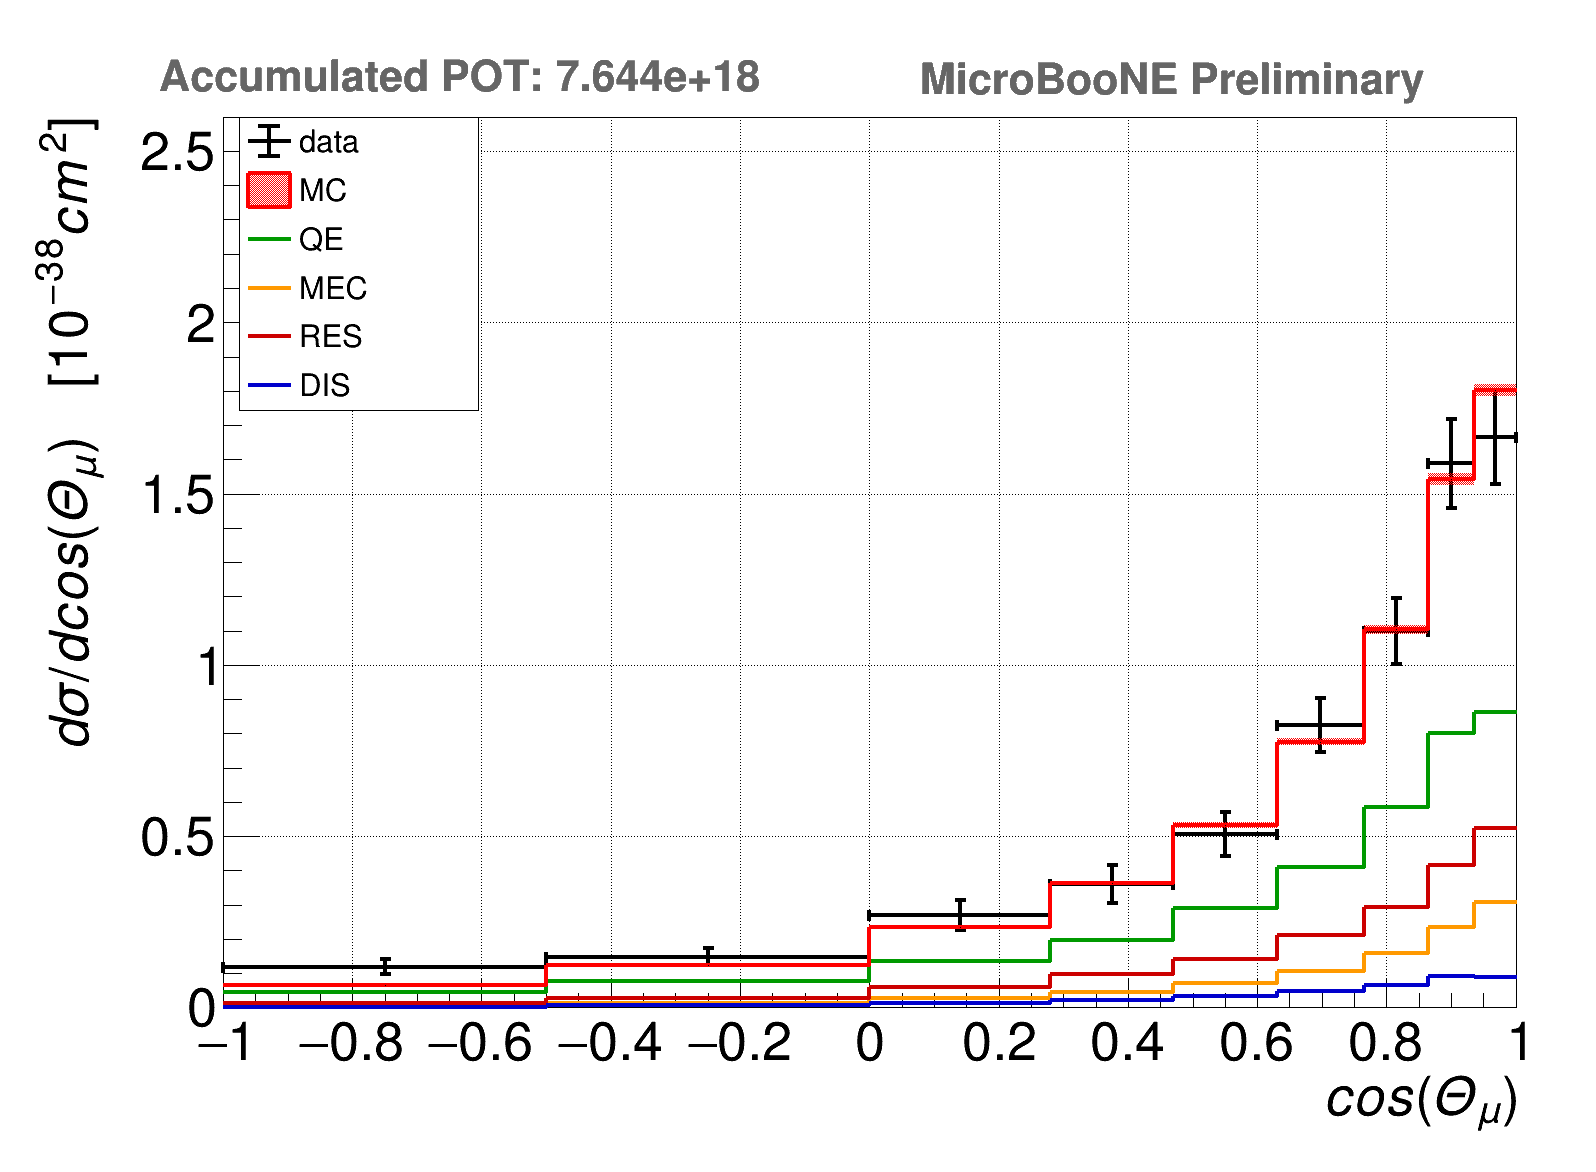

In [71]:
legend = ROOT.TLegend(0.15,0.65,0.3,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
legend.AddEntry(h_QE,'QE',"l");
legend.AddEntry(h_MEC,'MEC',"l");
legend.AddEntry(h_RES,'RES',"l");
legend.AddEntry(h_DIS,'DIS',"l");
h_data.SetYTitle("d\sigma / dcos(\Theta_{\mu}) \t [10^{-38} cm^{2}]")
h_data.SetXTitle("cos(\Theta_{\mu})")
h_data.SetLineWidth(3)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetMaximum(2.6)
h_data.SetMinimum(0)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_data.Draw('E1')

h_QE.Draw('hist same')
h_MEC.Draw('hist same')
h_RES.Draw('hist same')
h_DIS.Draw('hist same')

h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_corr_theta_channel.png")
c1.SaveAs(outputdir_root + "h_xsec_corr_theta_channel.root")
c1.SaveAs(outputdir_pdf + "h_xsec_corr_theta_channel.pdf")

#h_data.Write("h_xsec_data_theta_channel")
#h_overlay_sig.Write("h_xsec_MC_theta_channel")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_xsec_corr_theta_channel_stacked.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_xsec_corr_theta_channel_stacked.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_xsec_corr_theta_channel_stacked.pdf has been created


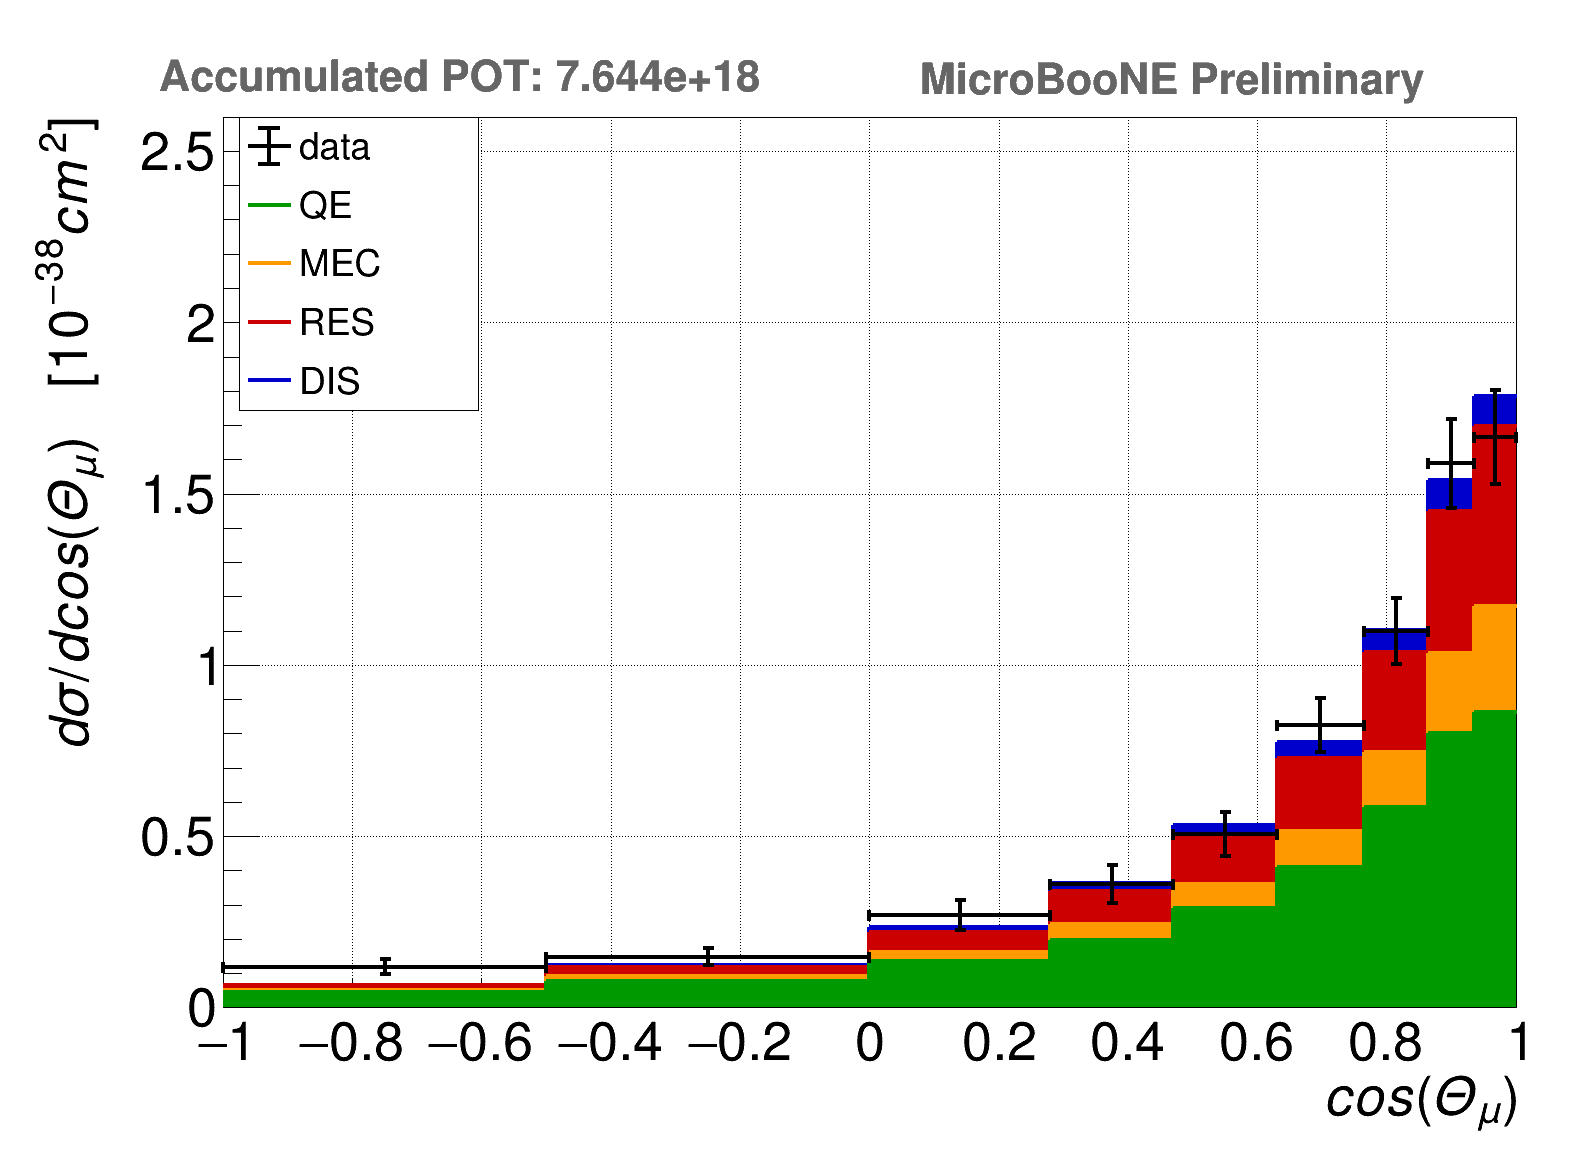

In [72]:
legend = ROOT.TLegend(0.15,0.65,0.3,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_QE,'QE',"l");
legend.AddEntry(h_MEC,'MEC',"l");
legend.AddEntry(h_RES,'RES',"l");
legend.AddEntry(h_DIS,'DIS',"l");h_data.SetYTitle("d\sigma / dcos(\Theta_{\mu}) \t [10^{-38} cm^{2}]")
h_data.SetXTitle("cos(\Theta_{\mu})")
h_data.SetLineWidth(3)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetMaximum(2.6)
h_data.SetMinimum(0)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_data.Draw('E1')

hs = ROOT.THStack("hs",'variable'+';'+'axis_name'+'; Entries per bin');
h_DIS.SetFillColor(ROOT.kBlue+1)
h_RES.SetFillColor(ROOT.kRed+1)
h_MEC.SetFillColor(ROOT.kOrange-3)
h_QE.SetFillColor(ROOT.kGreen+2)
hs.Add(h_QE)
hs.Add(h_MEC)
hs.Add(h_RES)
hs.Add(h_DIS)

hs.Draw('hist same')
h_data.Draw('E1 same')

legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_corr_theta_channel_stacked.png")
c1.SaveAs(outputdir_root + "h_xsec_corr_theta_channel_stacked.root")
c1.SaveAs(outputdir_pdf + "h_xsec_corr_theta_channel_stacked.pdf")

#h_data.Write("h_xsec_data_theta_channel")
#h_overlay_sig.Write("h_xsec_MC_theta_channel")

489

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_xsec_corr_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_xsec_corr_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_xsec_corr_theta.pdf has been created


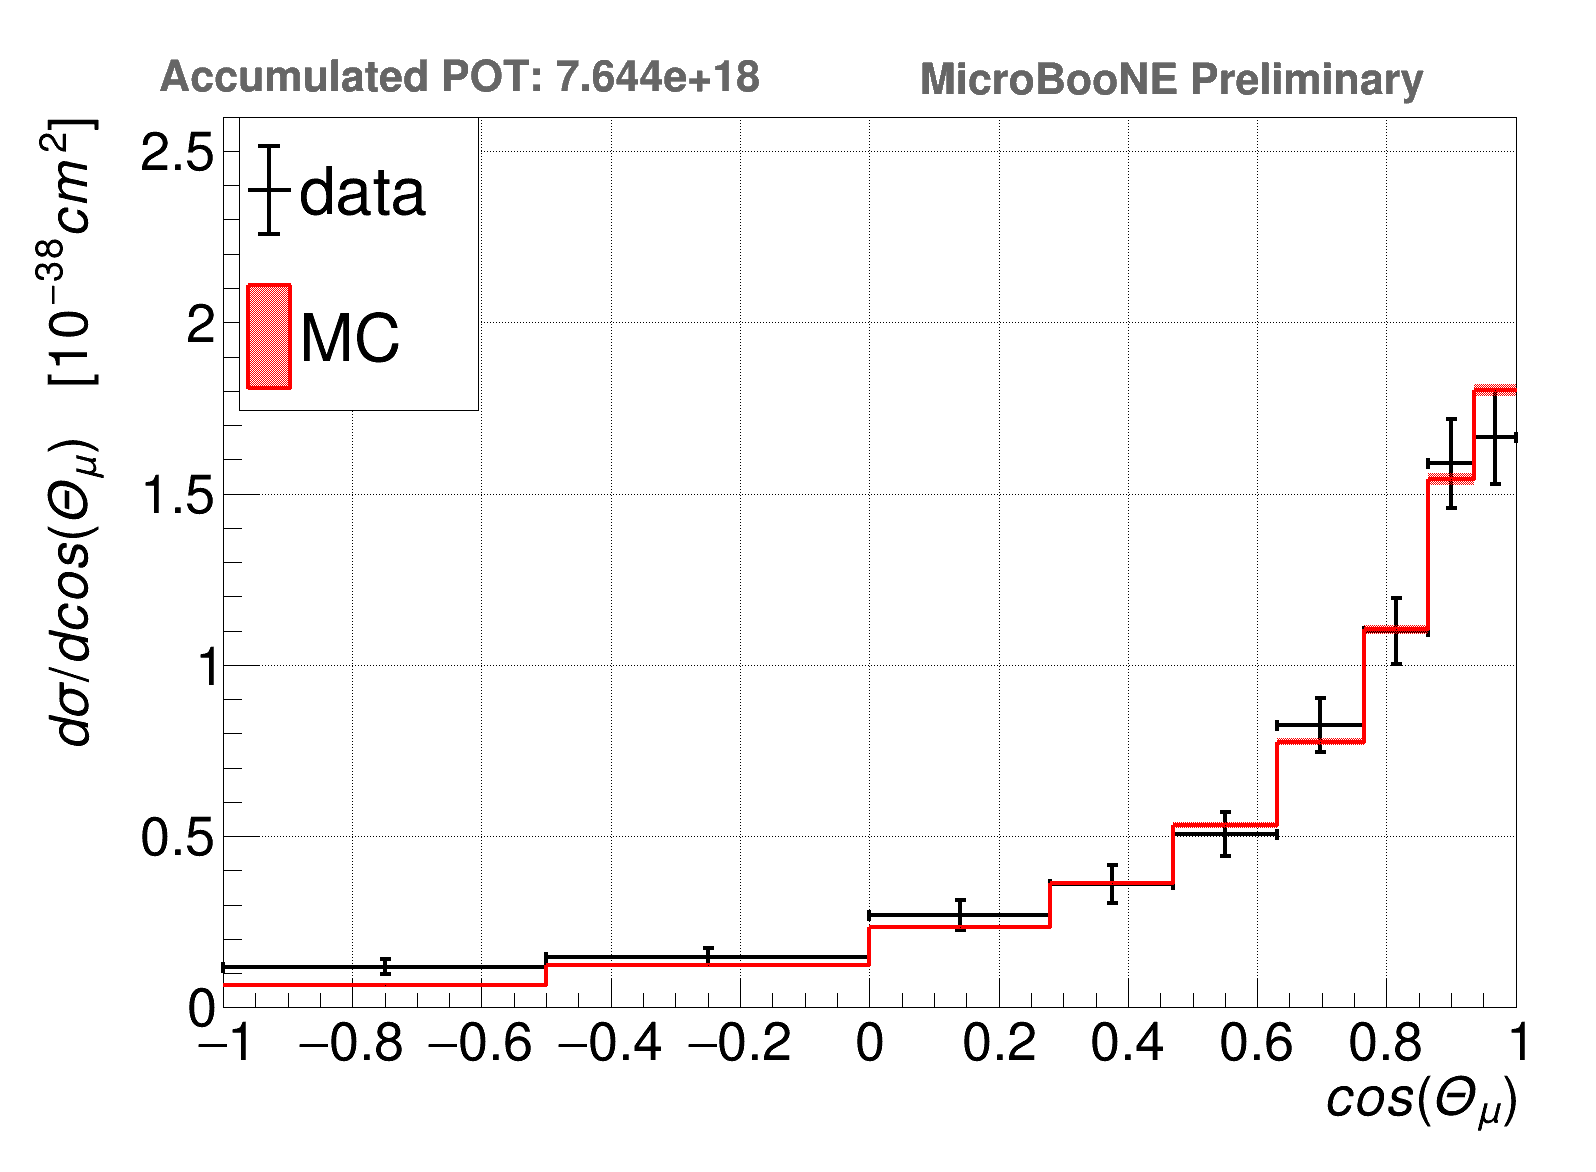

In [73]:
legend = ROOT.TLegend(0.15,0.65,0.3,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("d\sigma / dcos(\Theta_{\mu}) \t [10^{-38} cm^{2}]")
h_data.SetXTitle("cos(\Theta_{\mu})")
h_data.SetLineWidth(3)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetMaximum(2.6)
h_data.SetMinimum(0)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_corr_theta.png")
c1.SaveAs(outputdir_root + "h_xsec_corr_theta.root")
c1.SaveAs(outputdir_pdf + "h_xsec_corr_theta.pdf")

h_data.Write("h_xsec_data_theta")
h_overlay_sig.Write("h_xsec_MC_theta")

483

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/png/h_xsec_corr_theta_ratio.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/root/h_xsec_corr_theta_ratio.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_wo_dirt/pdf/h_xsec_corr_theta_ratio.pdf has been created


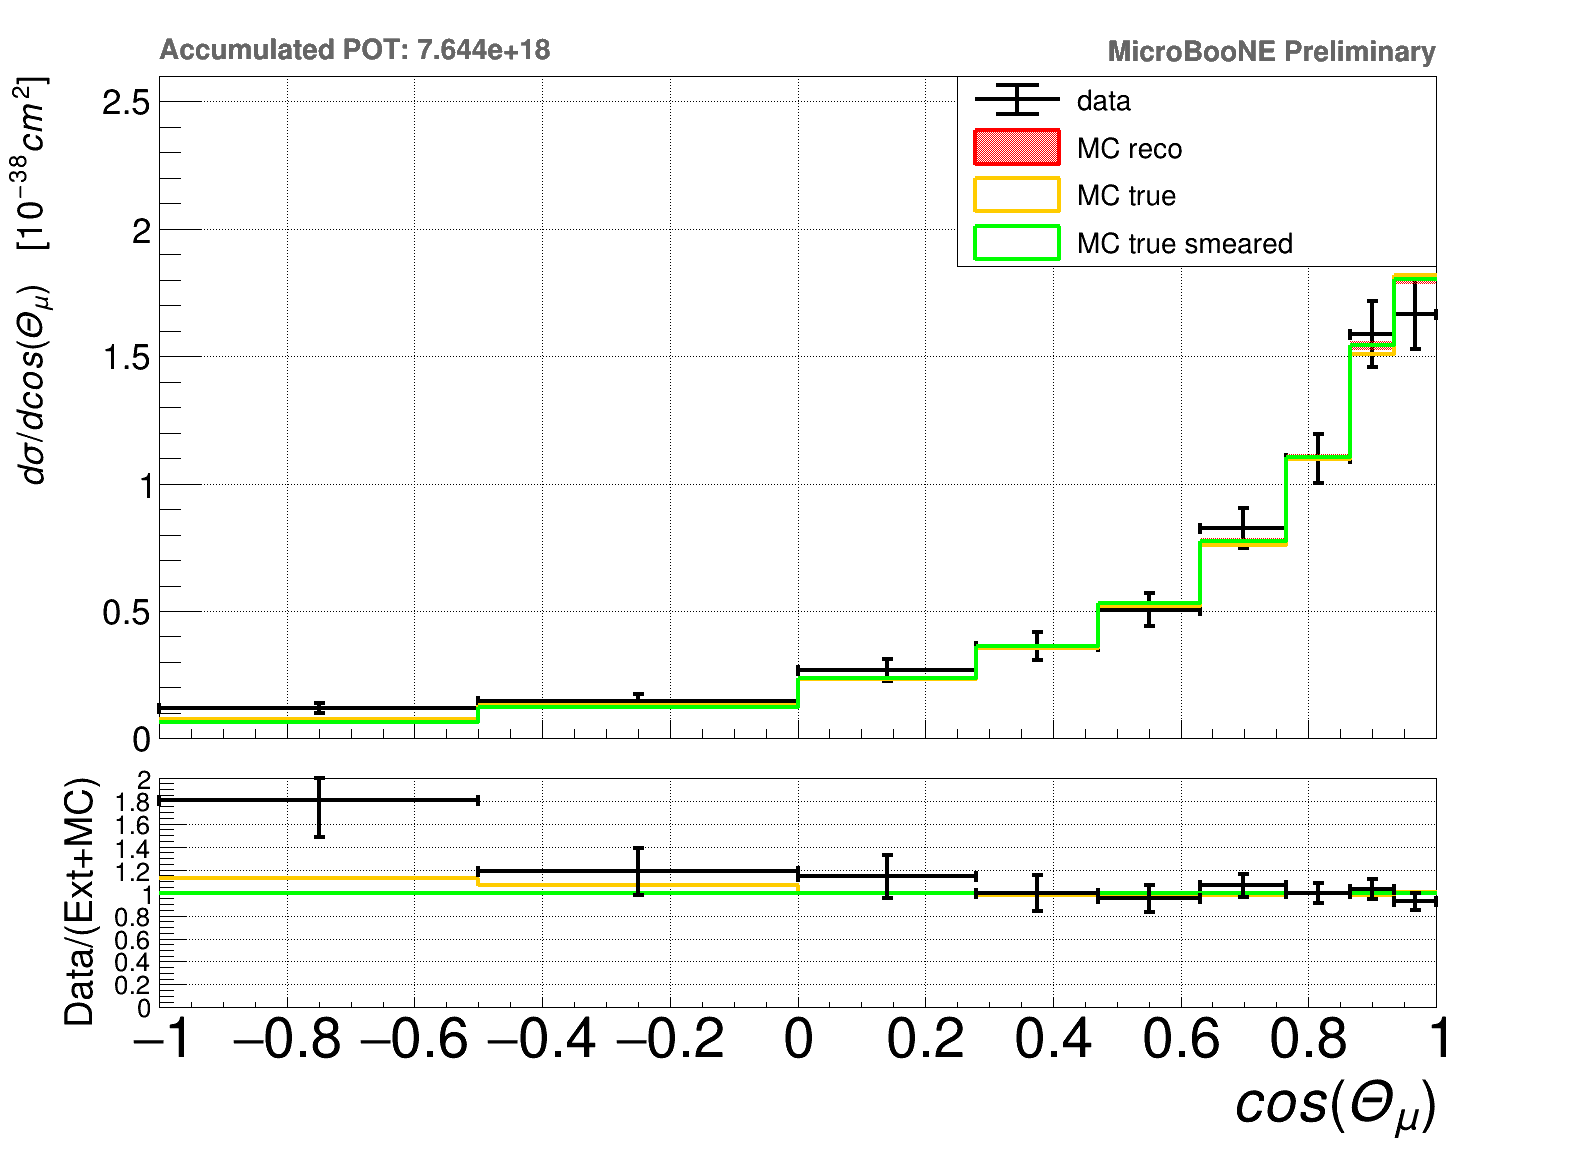

In [74]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)
#c1.SetFillStyle(4000);
# first pad
c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC reco',"f");
legend.AddEntry(h_true,'MC true',"f");
legend.AddEntry(h_true_smeare,'MC true smeared',"f");

h_data.SetYTitle("d\sigma / dcos(\Theta_{\mu}) \t [10^{-38} cm^{2}]")
h_data.SetXTitle("cos(\Theta_{\mu})")
h_data.SetLineWidth(3)
h_data.SetMaximum(2.6)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.05)

h_data.GetXaxis().SetLabelOffset(999);
h_data.GetXaxis().SetTitleOffset(999);
h_data.GetXaxis().SetLabelSize(0);
h_data.GetXaxis().SetTitleSize(0);

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
h_true.Draw('hist same')
h_true_smeare.Draw('hist same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()

c1.cd()
h_data.GetXaxis().SetLabelOffset(0);
h_data.GetXaxis().SetTitleOffset(0);

pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()

h_overlay_sig_ratio = h_overlay_sig.Clone()
h_overlay_sig_ratio.Divide(h_overlay_sig)
h_overlay_true_ratio = h_true.Clone()
h_overlay_true_ratio.Divide(h_overlay_sig)
h_overlay_data_ratio = h_data.Clone()
h_overlay_data_ratio.Divide(h_overlay_sig)
h_overlay_true_smeare_ratio = h_true_smeare.Clone()
h_overlay_true_smeare_ratio.Divide(h_overlay_sig)

h_overlay_data_ratio.SetMinimum(0.0)
h_overlay_data_ratio.SetMaximum(2.0)
h_overlay_sig_ratio.SetFillColor(0)
h_overlay_data_ratio.SetYTitle('Data/(Ext+MC)')
h_overlay_data_ratio.GetYaxis().SetTitleSize(0.1)
h_overlay_data_ratio.GetYaxis().SetTitleOffset(0.3)
h_overlay_data_ratio.GetYaxis().SetLabelSize(0.07)
h_overlay_data_ratio.GetXaxis().SetTitleSize(0.15)
h_overlay_data_ratio.GetXaxis().SetLabelSize(0.15)
h_overlay_data_ratio.GetXaxis().SetTitleOffset(1)

h_overlay_data_ratio.Draw('E1')
h_overlay_true_ratio.Draw('hist same')
h_overlay_sig_ratio.Draw('same hist')
h_overlay_true_smeare_ratio.Draw('same hist')
h_overlay_data_ratio.Draw('E1 same')


c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_corr_theta_ratio.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_corr_theta_ratio.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_corr_theta_ratio.pdf")

h_data.Write("h_xsec_data")
h_overlay_sig.Write("h_xsec_MC")

In [75]:
# close the root file with all the histos
RootFile.Close()